# Bank Customer Churn Modeling
_Introduction to Neural Networks_

__Joseph Reves joe.reves@gmail.com__

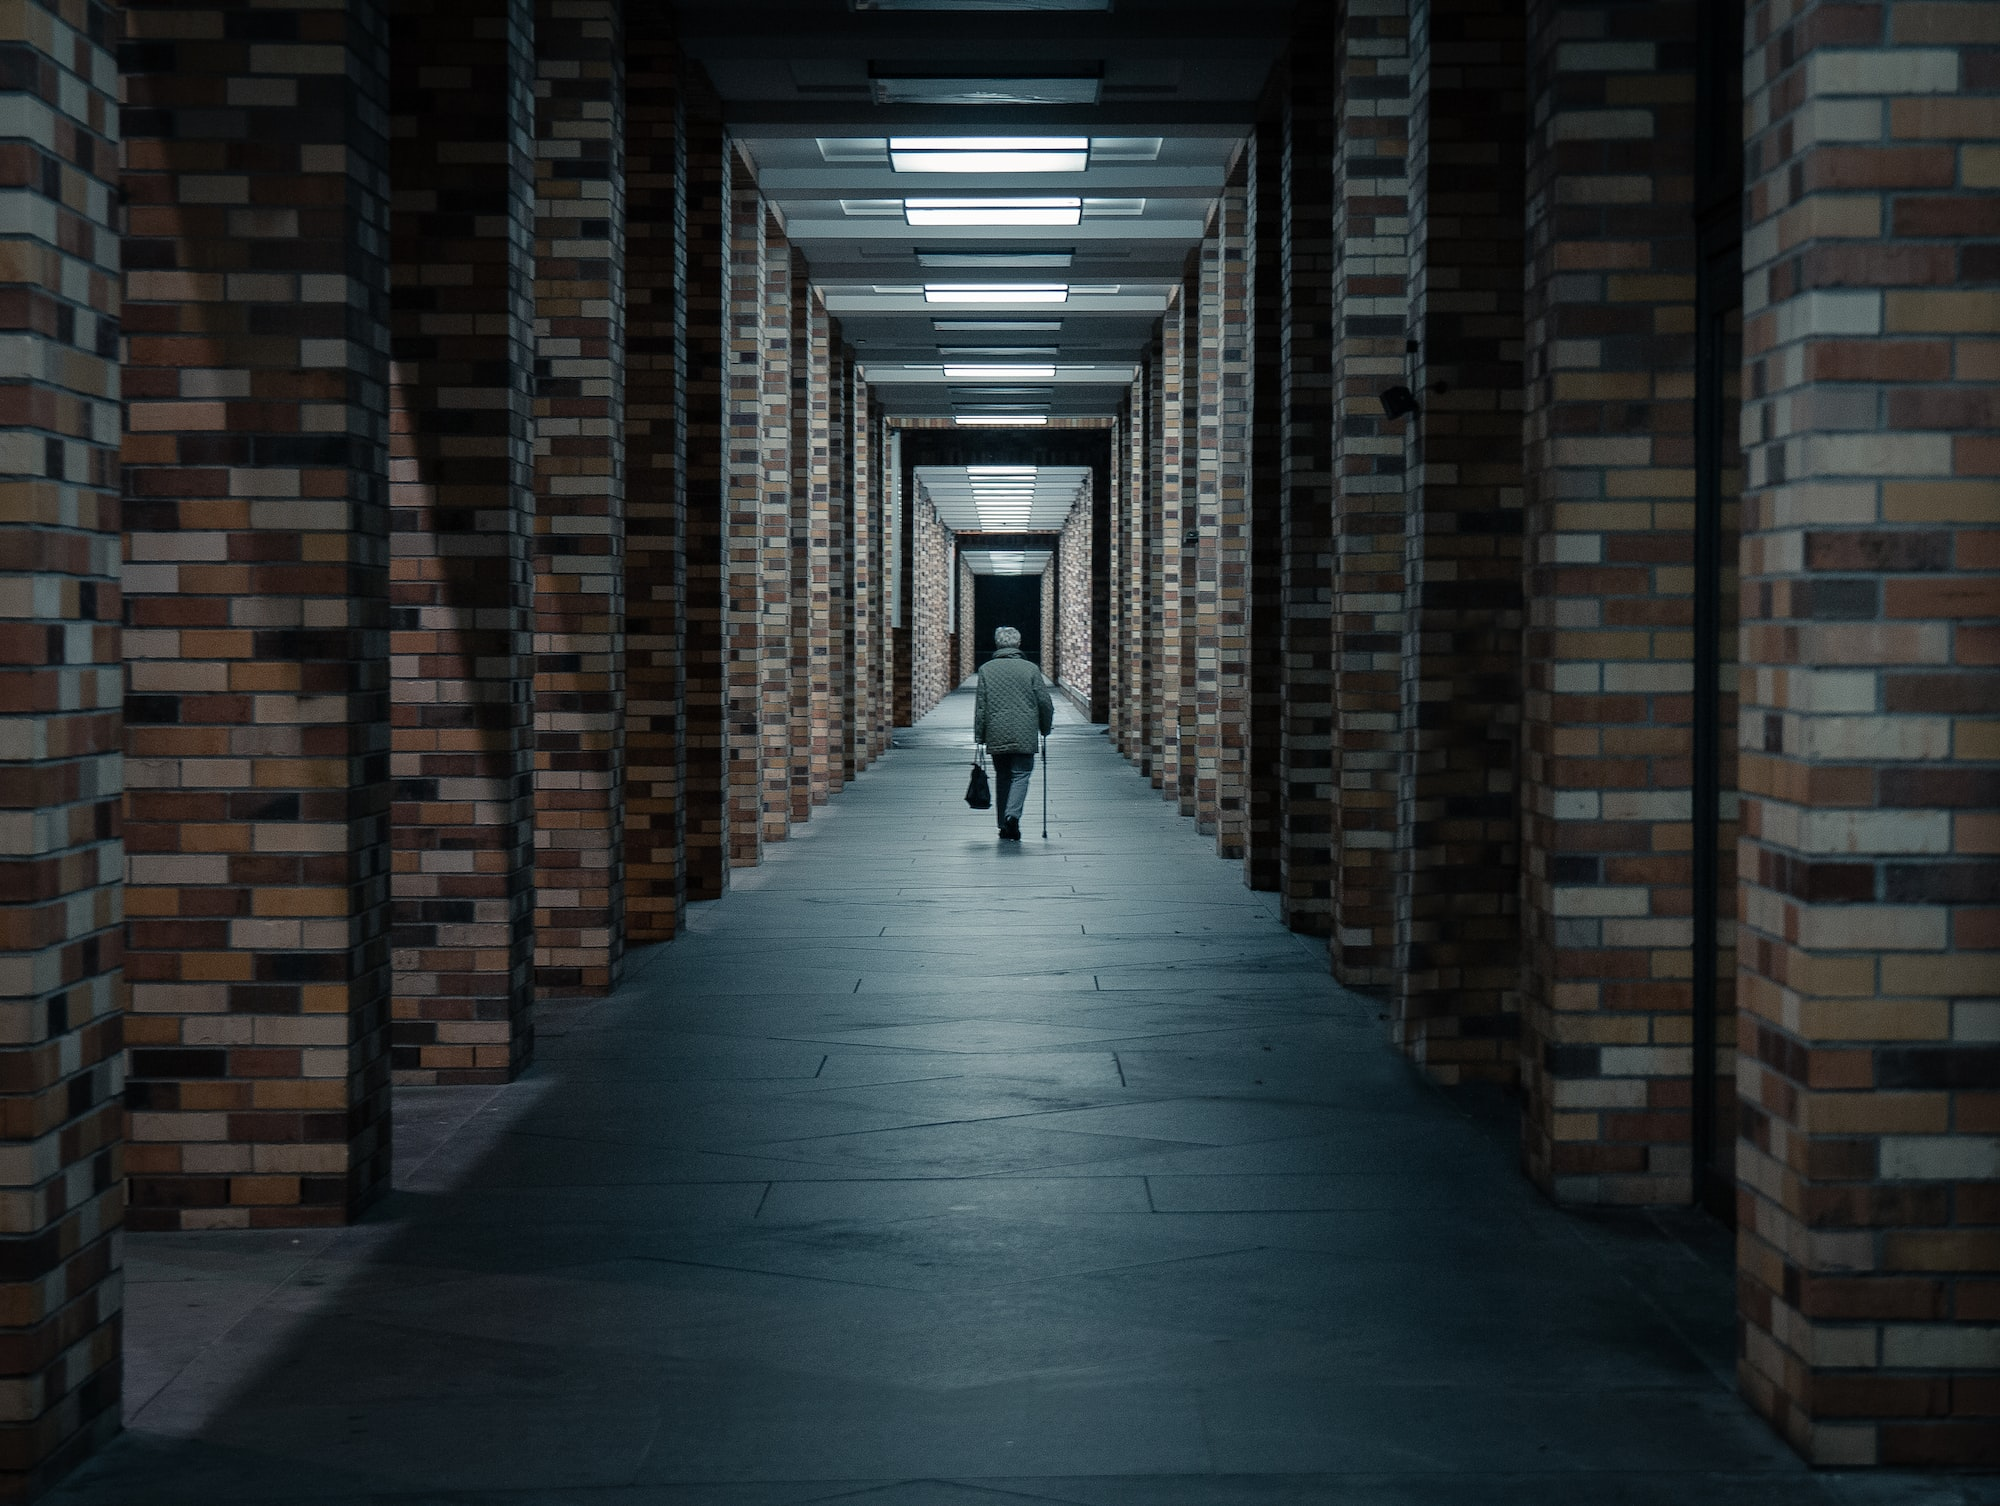

## Context and Objectives

Businesses such as banks providing services must concern themselves with the issue of 'Customer Churn' — when customers switch to another service provider. It is crucial to comprehend the factors that influence a customer's decision in this matter. Such understanding guides management's efforts to enhance the service, while considering these priorities.

__Objective__

As the bank's chief Data scientist, you are tasked to build a neural network based classifier that can determine whether a customer will leave the bank within the next 6 months.

__Key Questions__
* What is the distribution of the credit score of customers? 
  * Are there any noticeable patterns or outliers in the distribution?
* How many active members are there with the bank?
* How are the different customer attributes correlated to each other?
* How do the rates of churn compare by gender?
* How are rates of churn correlated to geography?

__Data Description__

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer
- CreditScore: Reflects the customer's credit history
- Geography: Customer location 
- Gender: Customer gender
- Age: Age of the customer 
- Tenure: Number of years the customer has been with the bank
- NumOfProducts: Number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: Customer is or is not a credit card holder 
- EstimatedSalary: Estimated salary 
- isActiveMember: Is the customer active and regularly engaged with bank services
- Exited : whether or not the customer left the bank within six month. It can take two values 
 * 0=No ( Customer did not leave the bank )
 * 1=Yes ( Customer left the bank )

## Assignment Objectives

__Exploratory Data Analysis__
* Define the problem statement
  * Read the dataset and print the overview of the data (statistical summary, shape, info, etc)
* Eliminate the features from the dataset that have only unique values with proper reasoning - 
* Univariate analysis - Key meaningful observations on individual variables and the relationship between variables
* Bivariate analysis - Use appropriate visualizations to identify the patterns and insights

__Data Pre-processing__
* Split the target variable and predictors
* Split the data into train and test
* Categorical Encoding
* Normalize the data

__Model building__
* Comment on the metric to use and the rationale
* Build the Neural Network model with SGD as an optimizer
* Comment on model performance

__Model Performance Improvement and Final Model Selection__
* Use different methods mentioned below to improve the model by finding the optimal threshold using ROC-AUC curves for each of the methods
 * Build a model with Adam optimizer
 * Build a model with Dropout and Adam optimizer
 * Build model with Hyperparameter tuning using Grid search and Adam optimizer
 * Build a model with balanced data by applying SMOTE and Adam optimizer
* Comment on model performance for each of the models
* Choose the best model from the ones built with proper reasoning.

__Actionable Insights & Recommendations__
* Key takeaways for the business
* Recommendations to the business

__Notebook - Overall quality__
* Structure and flow
 * Crispness
 * Visual appeal 
 * Well commented code
* Conclusion and business presentation

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# useful utilities
import random
import pandas_profiling
from tabulate import tabulate
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, accuracy_score, f1_score

# data transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from IPython.display import Image

%matplotlib inline

# ANN modeling libraries
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD

# Libraries for keras model visualization
import visualkeras
from PIL import ImageFont
from keras_visualizer import visualizer


# Gridsearch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Supress Warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# Version, and GPU availability
print("TensorFlow version:", tf.__version__)
print("Number of GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

TensorFlow version: 2.10.0
Number of GPUs Available:  1


<IPython.core.display.Javascript object>

## Loading the dataset

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "Churn.csv" dataset from the local directory where the notebook is stored.
</div>

<div class="alert alert-block alert-info">
<b>Dependency:</b> For this project, I'm using Anaconda on my local machine with GPU processing on my AMD GPU enabled. 
I've installed Microsoft's DirectML-Plugin to enable the backend for TensorFlow.
</div>

In [3]:
# Reading the bank customer churn dataset with the read_csv function from pandas package
churn_cust = pd.read_csv("Churn.csv")

<IPython.core.display.Javascript object>

In [4]:
# Let's make a copy while we explore the data, and potentially make some changes
customers = churn_cust.copy()

<IPython.core.display.Javascript object>

## Data Overview

In [5]:
# Quick look at a random sample of values in the data
customers.sample(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
7404       7405    15694677  Bennetts          733    France    Male   39   
5586       5587    15699446     Hobbs          816   Germany  Female   25   
2725       2726    15597951      Muir          471    France  Female   58   
2173       2174    15649738     White          698    France  Female   46   
5116       5117    15649536      Wong          741   Germany    Male   38   
594         595    15603925     Greco          779     Spain  Female   26   
792         793    15707473   Summers          850   Germany  Female   48   
7484       7485    15646563    Wright          772    France  Female   35   
7352       7353    15809800  Korovina          726    France  Female   38   
4629       4630    15687153    Graham          850   Germany    Male   49   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7404       1       0.00              2          1               1   
5586       2  150355.35              2          1               1   
2725       4  114713.57              1          1               1   
2173       0       0.00              2          1               1   
5116       4  128015.83              1          1               0   
594        4  174318.13              2          0               1   
792        6  111962.99              1          1               0   
7484       9       0.00              1          0               1   
7352       4       0.00              2          0               0   
4629       8   98649.55              1          1               0   

      EstimatedSalary  Exited  
7404        141841.31       0  
5586         35770.84       0  
2725         36315.03       0  
2173        125962.02       0  
5116         58440.43       0  
594          38296.21       0  
792         111755.80       0  
7484         25448.31       0  
7352          6787.48       0  
4629        119174.88       1

<IPython.core.display.Javascript object>

In [6]:
# What's the size and shape of the data?
print(
    "The available data includes",
    customers.shape[0],
    "rows, with",
    customers.shape[1],
    "columns of information",
)

The available data includes 10000 rows, with 14 columns of information


<IPython.core.display.Javascript object>

In [7]:
# How is the data currently typed by python?
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [8]:
# check for null values in the data
customers.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# describe the numeric variables
customers.describe(exclude="object").applymap(lambda x: f"{x:0.3f}").T

count          mean        std           min  \
RowNumber        10000.000      5000.500   2886.896         1.000   
CustomerId       10000.000  15690940.569  71936.186  15565701.000   
CreditScore      10000.000       650.529     96.653       350.000   
Age              10000.000        38.922     10.488        18.000   
Tenure           10000.000         5.013      2.892         0.000   
Balance          10000.000     76485.889  62397.405         0.000   
NumOfProducts    10000.000         1.530      0.582         1.000   
HasCrCard        10000.000         0.706      0.456         0.000   
IsActiveMember   10000.000         0.515      0.500         0.000   
EstimatedSalary  10000.000    100090.240  57510.493        11.580   
Exited           10000.000         0.204      0.403         0.000   

                          25%           50%           75%           max  
RowNumber            2500.750      5000.500      7500.250     10000.000  
CustomerId       15628528.250  15690738.000  15753233.750  15815690.000  
CreditScore           584.000       652.000       718.000       850.000  
Age                    32.000        37.000        44.000        92.000  
Tenure                  3.000         5.000         7.000        10.000  
Balance                 0.000     97198.540    127644.240    250898.090  
NumOfProducts           1.000         1.000         2.000         4.000  
HasCrCard               0.000         1.000         1.000         1.000  
IsActiveMember          0.000         1.000         1.000         1.000  
EstimatedSalary     51002.110    100193.915    149388.247    199992.480  
Exited                  0.000         0.000         0.000         1.000

<IPython.core.display.Javascript object>

In [10]:
# describe the object features
customers.describe(include="object").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

<IPython.core.display.Javascript object>

In [11]:
# get a list of our object columns
objects = customers.select_dtypes(["object"])
object_cols = objects.columns
print(object_cols)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


<IPython.core.display.Javascript object>

In [12]:
# get a list of all our columns
columns = customers.columns
print(columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


<IPython.core.display.Javascript object>

In [13]:
for i in customers.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(customers[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* __Looking at the top Surnames, it seems like there are a number of families banking together. That's relevant because when one member of a family churns, the other members are more likely to follow them.__

__Duplicate Handling__

* __For this dataset, we have unique identifiers, so we'll exclude those and check for duplicate records__


In [14]:
# check for duplicates
customers[
    customers.duplicated(
        subset=[
            "Surname",
            "CreditScore",
            "Geography",
            "Gender",
            "Age",
            "Tenure",
            "Balance",
            "NumOfProducts",
            "HasCrCard",
            "IsActiveMember",
            "EstimatedSalary",
            "Exited",
        ],
        keep=False,
    )
].sort_values(by=["Surname"])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

<IPython.core.display.Javascript object>

* __No duplicate records found__

In [15]:
# Let's drop columns that won't help our ANN analysis
customers.drop(
    ["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True
)  # No value here for our model

<IPython.core.display.Javascript object>

* __If we wanted to pull in additional demographic or behavioral data, we would probably use the CustomerId key to join data from other sources. But for our purposes in training a predictive model, we'll work with the data in this set__


__We're ready to begin our exploratory data analysis__

## Exploratory Data Analysis

#### Useful Functions

In [16]:
# Defining the function for creating boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, hue=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if (bins) and (hue):
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist2,
            hue=hue,
            bins=bins,
            color="mediumpurple",
        )
    elif bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    elif hue:
        sns.histplot(
            data=data, x=feature, kde=kde, hue=hue, ax=ax_hist2, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [17]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Data Profile

In [19]:
# Let's use pandas profiling from y-data to explore the larger dataset
customers.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

#### Quick Observations on Data Correlations:

* __This confirms no missing records, but we do have some features with significant zero values__
* __Our strongest correlations are `Exited` and `Age` and `Exited` and `NumOfProducts`__
* __`Geograpy`, `Gender`, `NumOfProducts`, `HasCrCard`,`IsActiveMember`, and `Exited` are all categorical__

__Customer Behaviors__

* __4.1% of the values for `Tenure` are zero. I'm interpreting this as customers who have joined within the last year__
* __36.2% of the customer `Balance` values we're tracking are zero. I'm interpreting that as valid for our analysis; carrying a zero balance on a credit card can be positive, but a zero bank account balance - not so much__ 
* __We'll look at the relationship between `Balance` and `Exited` to see how many of the zero balance customers have already left us__

__Variables__
* __`CreditScore` is slightly left-skewed. Minimum value is 350, but about 2.3% of our customers have an 850 score__
* __`Geography` appears to be limited to France, Spain, and Germany with about half our customers in France__
* __We're tracking Male/Female genders, with about 55% male__
* __The `Age` distribution is right-skewed, with a few customers as old as 92. Minimum age for an account is 18__
* __`Tenure` is fairly evenly distributed, but it's notable that 4.1% of our customers have less than one year__
* __Excluding zero-balance customers, balances are well distributed with the mean and median fairly close. But over a third of our customers are carrying zero balances, which doesn't help us generate revenue__
* __About half of our customers use only one of our products, with about 46% using two products. A little over three percent have more than two products__
* __About 70% of our customers have credit cards__
* __A little over half of our customers are listed as `IsActiveMember`__
* __Binning `EstimatedSalary` into 50 buckets, our customers income is fairly uniforming distributed up to about \$200K__
* __About 20% of the customers we're inspecting are listed as having dropped our services__

#### Let's dig into a few areas to clarify...

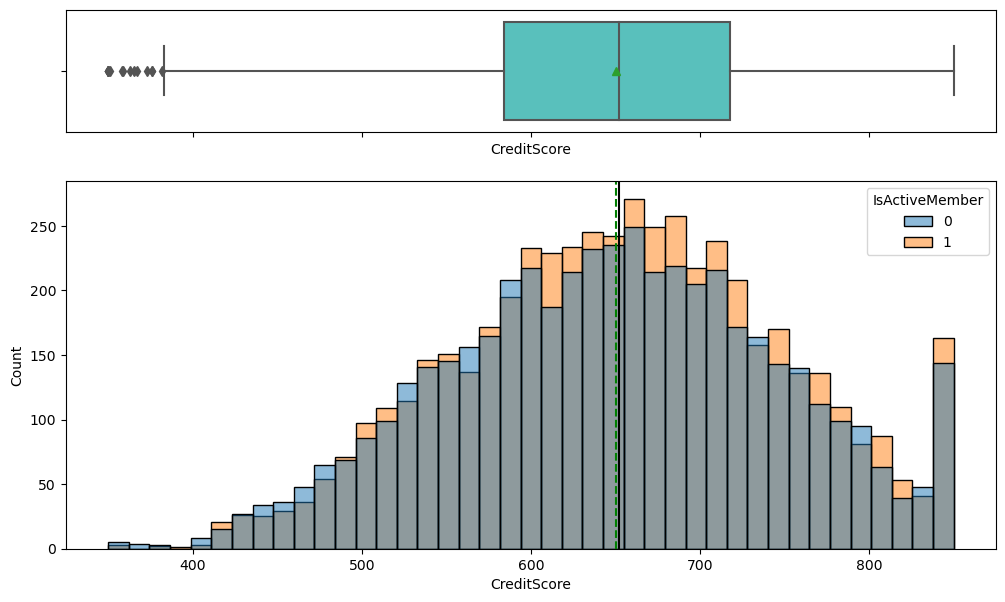

<IPython.core.display.Javascript object>

In [20]:
# Let's start by looking at the distribution of credit scores
histogram_boxplot(customers, "CreditScore", hue="IsActiveMember")

* __We can see that some of our less active customers tend to have lower credit scores__
* __It's interesting to note the cluster of customers with the max value for credit score, 850. These may be customers worth focusing on__

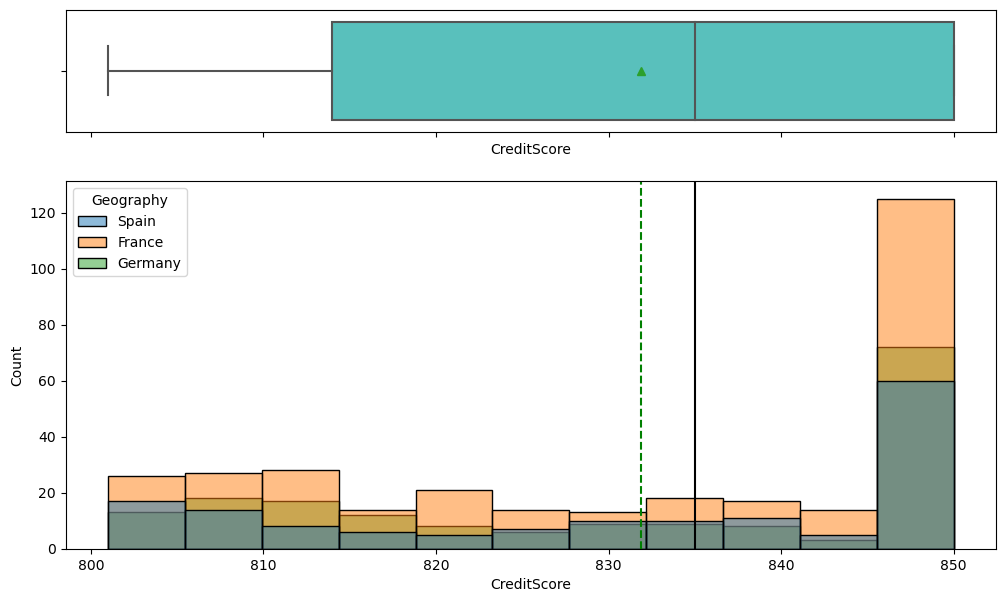

<IPython.core.display.Javascript object>

In [21]:
# Where are the customers with the highest credit scores?
highscore_customers = customers.loc[customers["CreditScore"] > 800]
histogram_boxplot(highscore_customers, "CreditScore", hue="Geography")

* __Mostly France, it seems - although that spike of 850 scoring customers seems equally divided between France and Germany__

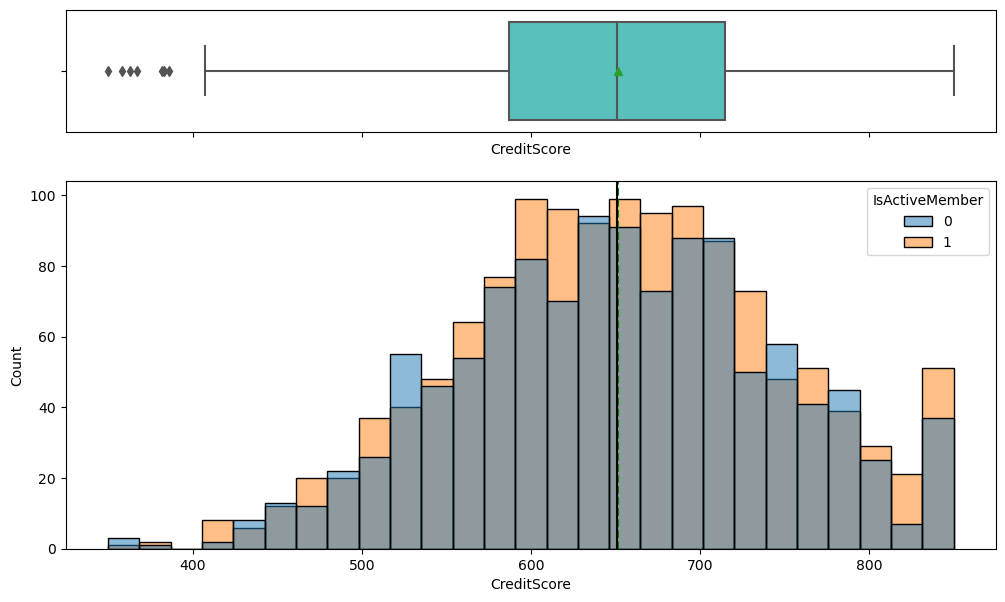

<IPython.core.display.Javascript object>

In [22]:
# What about our Spanish customers?
spanish_customers = customers.loc[customers["Geography"] == "Spain"]
histogram_boxplot(spanish_customers, "CreditScore", hue="IsActiveMember")

* __Focusing on customers from Spain, there are lower counts - but a comparable distribution__

0    7963
1    2037
Name: Exited, dtype: int64


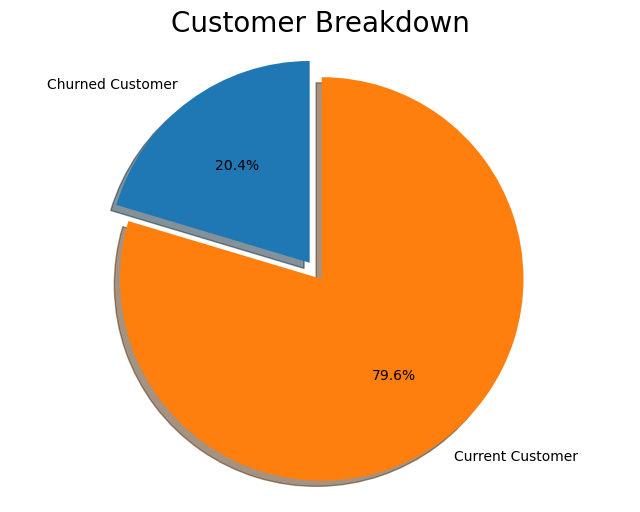

<IPython.core.display.Javascript object>

In [23]:
print(customers.Exited.value_counts())
labels = "Churned Customer", "Current Customer"
# sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [
    customers.Exited[customers["Exited"] == 1].count(),
    customers.Exited[customers["Exited"] == 0].count(),
]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")
plt.title("Customer Breakdown", size=20)
plt.show()

* __About one fifth of the records in our data represent customers we know have churned__

__Now - excluding customers that have already dropped our service, how many of our remaining customers are Active?__

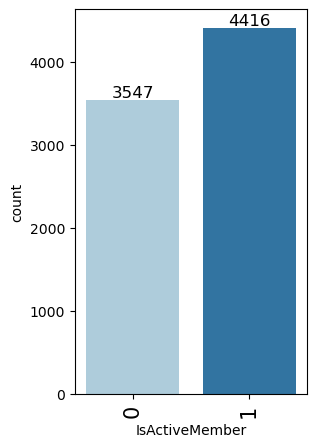

<IPython.core.display.Javascript object>

In [24]:
# How active are our current customers?
current_customers = customers.loc[
    customers["Exited"] == 0
]  # excluding former customers
labeled_barplot(current_customers, "IsActiveMember")

* __So - After excluding customers we know have left our service, of the remaining customers only 55% are actively using our services.  That seems like an urgent call to action to engage more frequently with existing customers before we lose them!__

__Let's take a closer look at the customers who are churning__

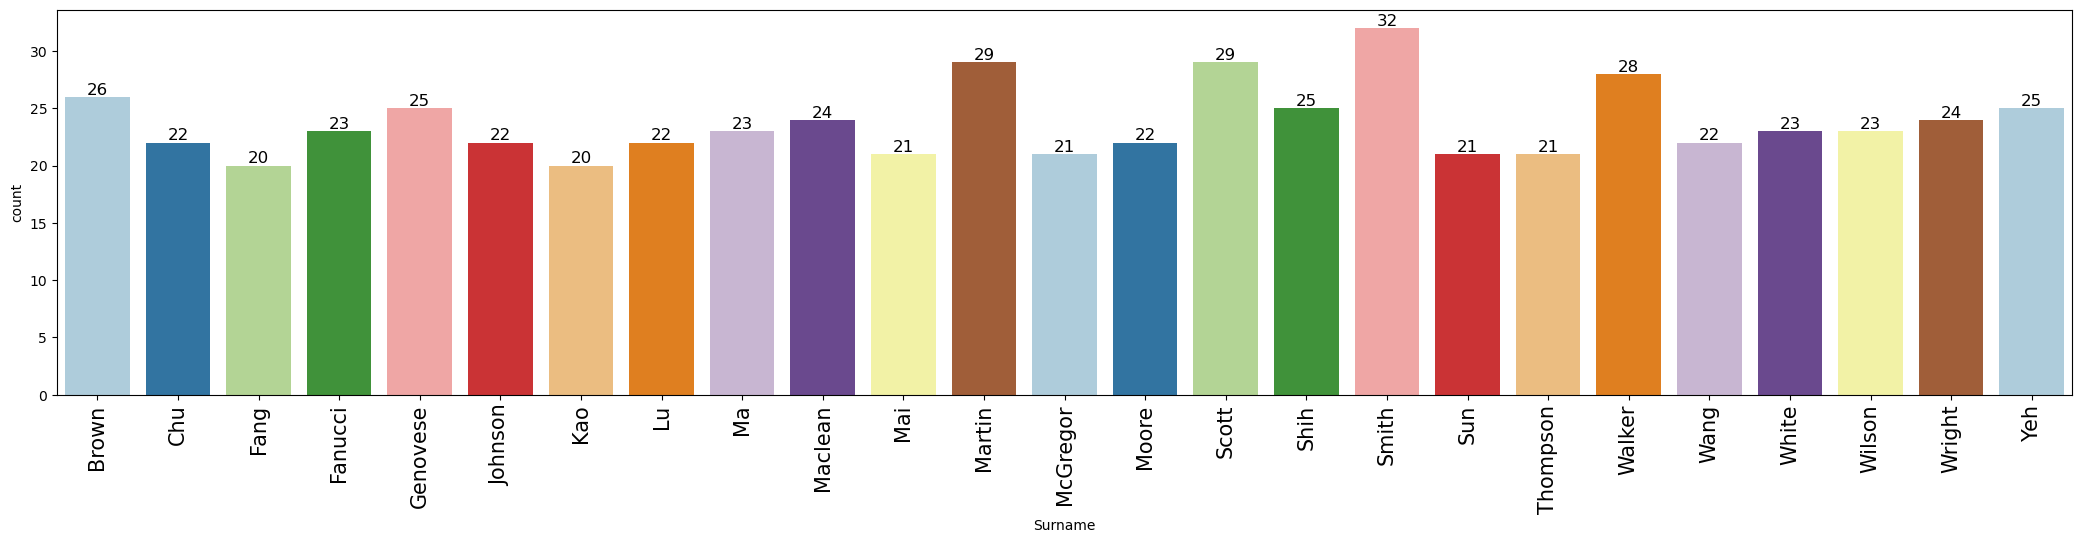

<IPython.core.display.Javascript object>

In [25]:
# Counts of surnames that appear in our data
labeled_barplot(
    churn_cust, "Surname", perc=False, n=25
)  # Note that we've dropped surnames for the customers dataset already

__We made the observation earlier that there seem to be clusters of customers with the same surname. This is relevant because when one member of a family churns, they can pull other family members with them.__

__In this case, I suspect that what we're seeing is an artifact of how this dataset was generated, so I won't delve into this any further. But in other circumstances, I might look at exits from one customer as an early indicator that we're at risk of losing other family members__

__Let's continue__

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


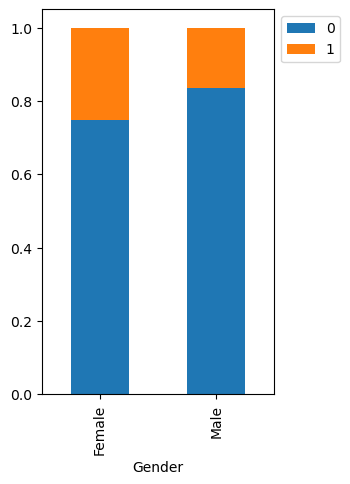

<IPython.core.display.Javascript object>

In [26]:
# Gender versus customers churning
stacked_barplot(customers, "Gender", "Exited")

* __Slighty more of the customers churning are Female__

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


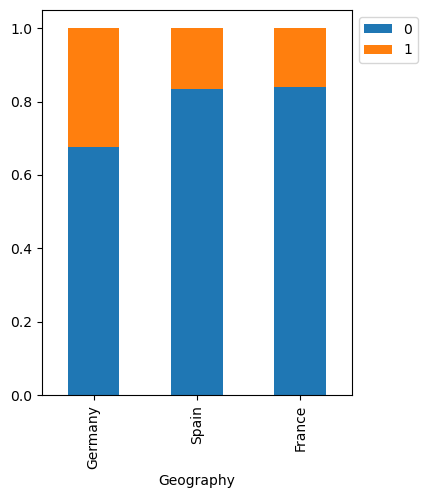

<IPython.core.display.Javascript object>

In [27]:
# Country versus customers churning
stacked_barplot(customers, "Geography", "Exited")

* __More customers churning in Germany, with France and Spain relatively equal__


* __Let's see the distribution of high credit score customers who have churned__

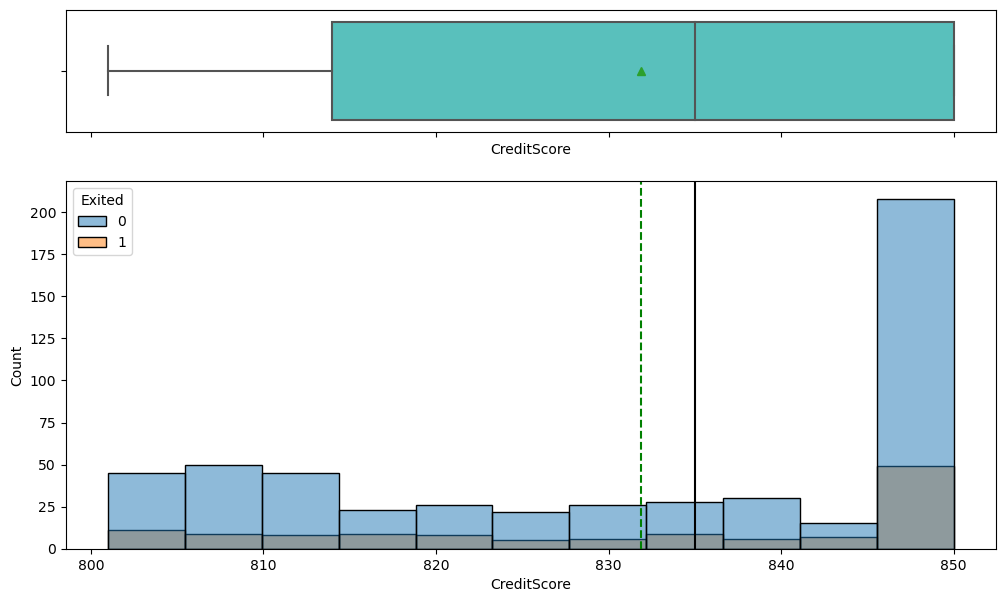

<IPython.core.display.Javascript object>

In [28]:
# High Credit Score customers that have churned
histogram_boxplot(highscore_customers, "CreditScore", hue="Exited")

* __Fairly proportionally distributed, but these are some of the most valuable customers for us that we're losing__

#### Correlations

In [29]:
# selecting numerical columns
num_cols = customers.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

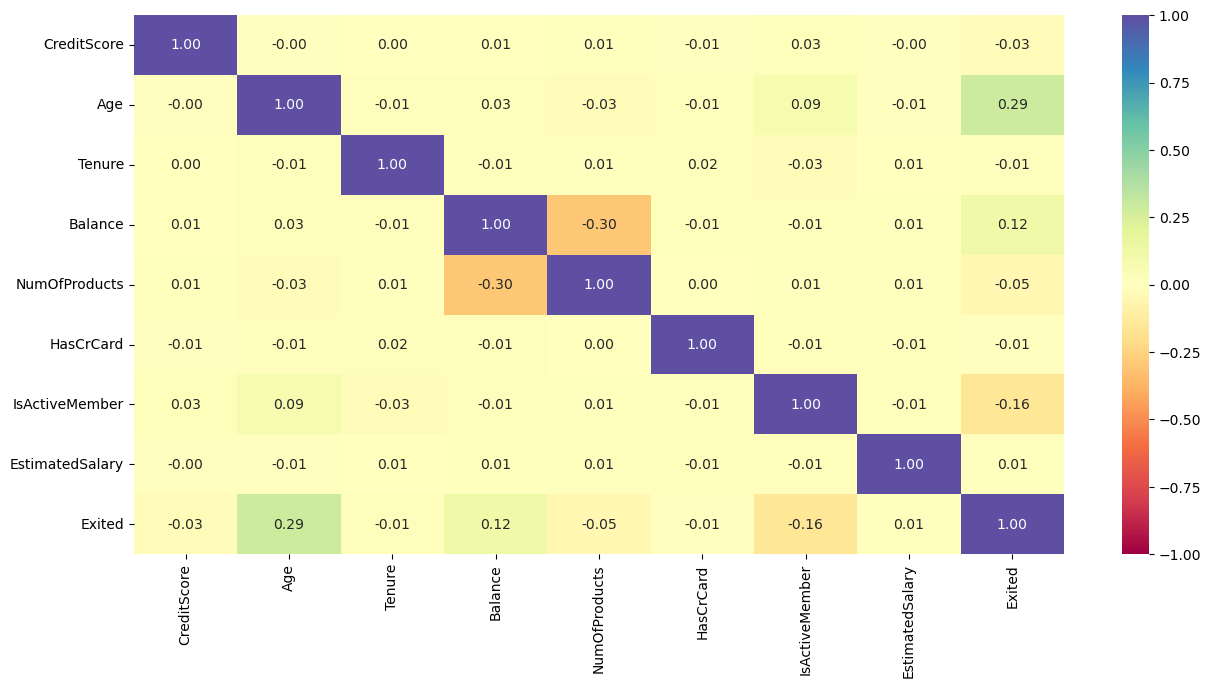

<IPython.core.display.Javascript object>

In [30]:
# Finally, let's plot our correlations
plt.figure(figsize=(15, 7))
sns.heatmap(
    customers[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* __Few strong correlations here. Note the negative correlation with `Exited` and `IsActiveMember`__

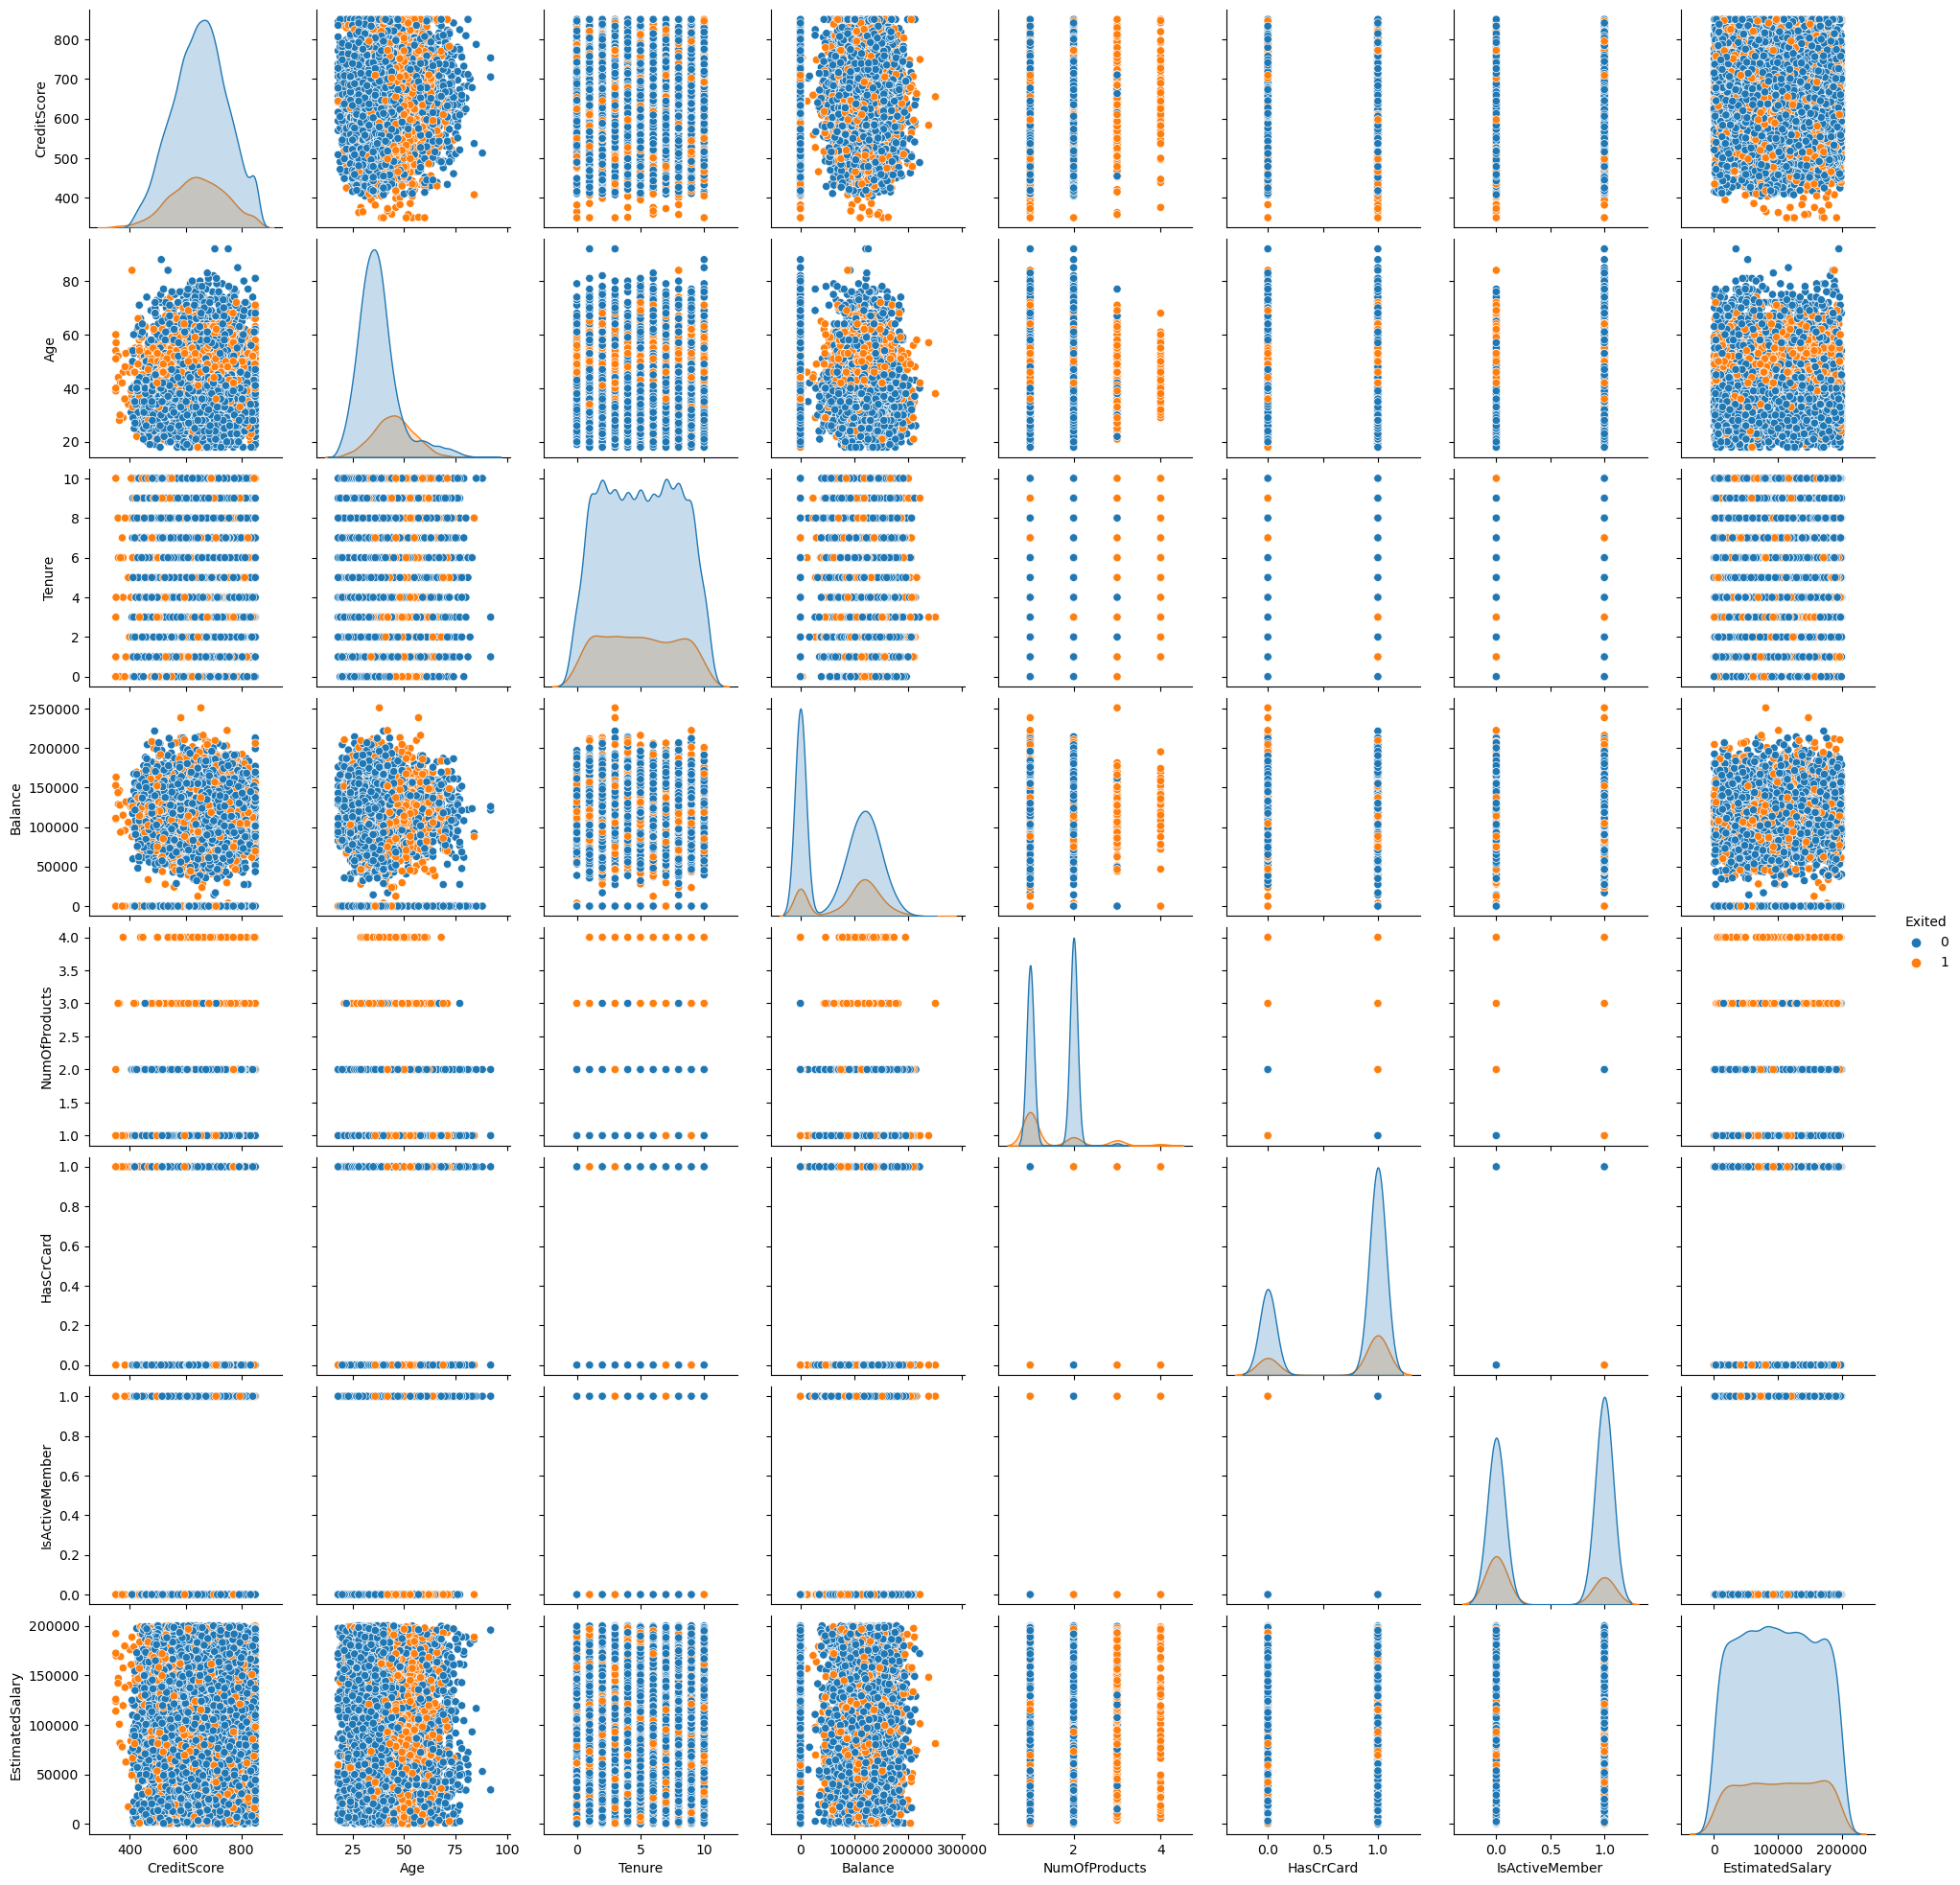

<IPython.core.display.Javascript object>

In [31]:
sns.pairplot(customers, diag_kind="kde", hue="Exited")
plt.show()

* __As noted, `Age` skews a little younger, and `Balance` shows the effect of customers with a zero outstanding balance__
* __Also note that older customers with more products are the bulk of our churn.__

## Data Preprocessing

__Our data includes a mix of categorical and continuous numerical features; we'll need to encode the categorical variables, and normalize the numeric values__

In [32]:
# What the current dataset look like?
customers.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1747          586   Germany    Male   34       9   74309.81              1   
9567          724    France    Male   29       4       0.00              1   
3387          537   Germany    Male   84       8   92242.34              1   
4516          497   Germany  Female   32       8  111537.23              4   
6552          793   Germany  Female   34       5  127758.09              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1747          1               0         15034.93       0  
9567          1               0          8982.75       0  
3387          1               1        186235.98       0  
4516          1               1          9497.99       1  
6552          1               0        143357.03       0

<IPython.core.display.Javascript object>

In [33]:
# Current columns and data we're preparing for analysis
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<IPython.core.display.Javascript object>

In [34]:
# Checking for missing values
customers.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<IPython.core.display.Javascript object>

__We'll use label encoding on the Geography and Gender categorical columns__

In [35]:
labelencoder_Geo = LabelEncoder()
customers["Geography"] = labelencoder_Geo.fit_transform(customers["Geography"])

<IPython.core.display.Javascript object>

In [36]:
labelencoder_Gender = LabelEncoder()
customers["Gender"] = labelencoder_Gender.fit_transform(customers["Gender"])

<IPython.core.display.Javascript object>

In [37]:
customers.sample(5)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9393          670          1       1   43       9  111677.88              1   
608           699          0       1   35       5       0.00              2   
2599          550          2       1   62       7   80927.56              1   
9984          602          1       1   35       7   90602.42              2   
4864          737          0       1   54       9       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9393          1               0        178827.30       1  
608           1               1         78397.24       0  
2599          0               1         64490.67       0  
9984          1               1         51695.41       0  
4864          1               0         83470.40       1

<IPython.core.display.Javascript object>

In [38]:
## Separating Independent and Dependent Columns
X = customers.drop(["Exited"], axis=1)
Y = customers[["Exited"]]

<IPython.core.display.Javascript object>

In [39]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [40]:
# scale the train and test data distinctly
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [41]:
# Checking class balance for whole data, train set and test set

totalTargets = Y.value_counts()[1]

print("Target values in Y")
print(
    Y.value_counts()[1],
    "(",
    "{:.2%}".format(Y.value_counts()[1] / customers.shape[0]),
    ")",
)
print("*" * 50)
print("Target value ratio in y_train")
print("{:.2%}".format(y_train.value_counts()[1] / totalTargets))
print("*" * 50)
print("Target value ratio in y_test")
print("{:.2%}".format(y_test.value_counts()[1] / totalTargets))
print("*" * 50)

Target values in Y
2037 ( 20.37% )
**************************************************
Target value ratio in y_train
80.02%
**************************************************
Target value ratio in y_test
19.98%
**************************************************


<IPython.core.display.Javascript object>

In [42]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


<IPython.core.display.Javascript object>

## Model Building

### Model Evaluation Criterion

In this use case, we're trying to predict whether a customer will leave or not within the near future. We have a data set that includes the characteristics of both customers with a long tenure with us, and customers who have "churned" - left our services for another vendor.

We'll be building neural networks to predict customers likely to churn.We want a probability of churn, so we'll treat this as a regression problem, and we'll seek the appropriate threshold for our prediction by evaluating the results of our models.

#### There are two potential wrong predictions we could make with our models:
*  __Predicting a customer will churn, and they actually remain our customer__
*  __Predicting a customer will not churn, and they actually then do churn and drop our services__

_A "positive" outcome is this case is a customer exiting our services_

#### How do we measure our optimized model?

* __Attempting to retain a customer that will not otherwise churn serves to build goodwill, and costs us very little__
* __Failing to anticipate that a customer will churn and failing to act to retain them is expensive, as is having to acquire new customers to replace them.__ 

__So - False Negatives are expensive.__

#### For this use case, we should optimize on the Recall score



### Useful Functions

In [43]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

### Model Building: Neural Network with SGD

***
For this model, we'll keep it simple.  An input, output, and a single hidden layer. We'll use a stochastic gradient descent optimizer, and a minimal number of nodes. We'll train on the data, and then use ROC-AUC to find the best threshold with this model.
***

In [44]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [45]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

In [46]:
# Initialize a basic Neural Network Model
model_0 = Sequential()
model_0.add(Dense(activation="relu", input_dim=10, units=32))
model_0.add(Dense(64, activation="relu"))
model_0.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [47]:
# Create optimizer with default learning rate
# Compile the model
model_0.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


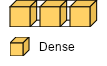

<IPython.core.display.Javascript object>

In [48]:
# Summarize the model
model_0.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_0, legend=True, font=font)

__Fit the data:__

In [49]:
%%time
history_0 = model_0.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=50,
                       verbose=2)

Epoch 1/50
200/200 - 1s - loss: 0.5472 - accuracy: 0.7636 - val_loss: 0.5006 - val_accuracy: 0.7906 - 971ms/epoch - 5ms/step
Epoch 2/50
200/200 - 1s - loss: 0.4843 - accuracy: 0.7977 - val_loss: 0.4763 - val_accuracy: 0.7906 - 591ms/epoch - 3ms/step
Epoch 3/50
200/200 - 1s - loss: 0.4641 - accuracy: 0.7975 - val_loss: 0.4601 - val_accuracy: 0.7906 - 589ms/epoch - 3ms/step
Epoch 4/50
200/200 - 1s - loss: 0.4505 - accuracy: 0.7981 - val_loss: 0.4496 - val_accuracy: 0.7925 - 587ms/epoch - 3ms/step
Epoch 5/50
200/200 - 1s - loss: 0.4411 - accuracy: 0.8030 - val_loss: 0.4414 - val_accuracy: 0.8000 - 590ms/epoch - 3ms/step
Epoch 6/50
200/200 - 1s - loss: 0.4343 - accuracy: 0.8070 - val_loss: 0.4353 - val_accuracy: 0.8087 - 587ms/epoch - 3ms/step
Epoch 7/50
200/200 - 1s - loss: 0.4288 - accuracy: 0.8102 - val_loss: 0.4305 - val_accuracy: 0.8125 - 584ms/epoch - 3ms/step
Epoch 8/50
200/200 - 1s - loss: 0.4240 - accuracy: 0.8137 - val_loss: 0.4261 - val_accuracy: 0.8119 - 589ms/epoch - 3ms/step


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8595


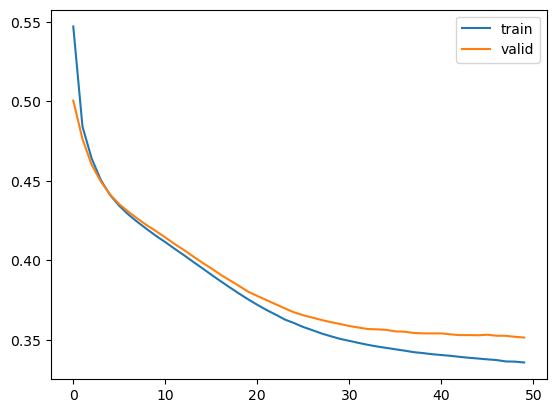

<IPython.core.display.Javascript object>

In [50]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_0.history)
hist["epoch"] = history_0.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = model_0.evaluate(X_test, y_test)

Not bad, for a very basic model that trains quickly.  I'm encouraged that training and validation are tracking, but overall accuracy is not sufficient for action.

Let's review predictions with the test data; we'll use a default threshold here of __0.5__

In [51]:
y_pred = model_0.predict(X_test)
y_pred = y_pred > 0.5

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

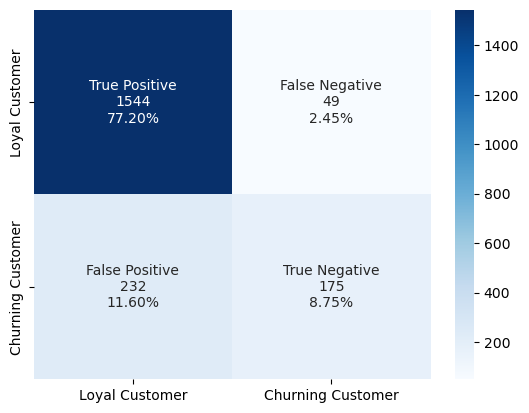

<IPython.core.display.Javascript object>

In [52]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

That's not a bad False Negative rate. We know our dataset is imbalanced, and we'll experiment later with balancing the data. But we're also using a default threshold, and we should try calculating a more useful threshold with an AUC-ROC curve.

Let's look at the classification report before we make any changes:

In [53]:
# print a classification report for these predictions
report_0 = metrics.classification_report(y_test, y_pred)
print(report_0)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



<IPython.core.display.Javascript object>

__Decent accuracy, but unusable recall and poor F1 for our target class. We're not predicting churning customers well__

__Let's tune the threshold using ROC-AUC__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.211725, G-Mean=0.758


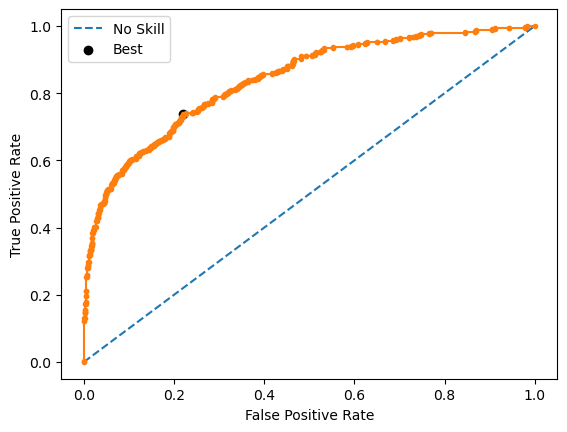

<IPython.core.display.Javascript object>

In [54]:
# predict probabilities
yhat0 = model_0.predict(X_test)

# keep probabilities for the positive outcome only
yhat0 = yhat0[:, 0]

# calculate roc curves
fpr, tpr, thresholds0 = roc_curve(y_test, yhat0)

# calculate the g-mean for each threshold
gmeans0 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans0)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds0[ix], gmeans0[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [55]:
# Predicting the results using best value as a threshold
y_pred_e0 = model_0.predict(X_test)
y_pred_e0 = y_pred_e0 > thresholds0[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

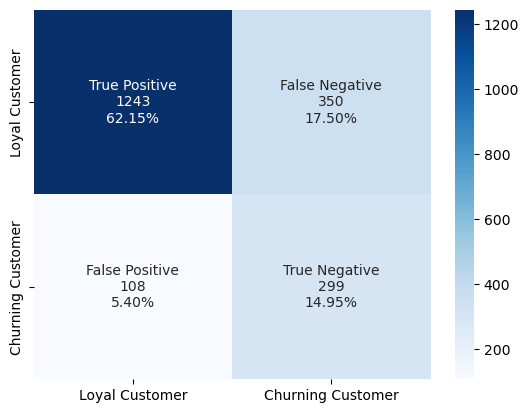

<IPython.core.display.Javascript object>

In [56]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e0)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

* __False Negatives are worse here__

__Let's see the classification report__

In [57]:
# Generate a classification report for these predictions
report_0 = metrics.classification_report(y_test, y_pred_e0)
print(report_0)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1593
           1       0.46      0.73      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



<IPython.core.display.Javascript object>

__Accuracy has declined, but Recall and F1 have improved.  We're seeing a more balanced result in predicting both classes of our target feature.__

### Model Building: Neural Network model with Adam Optimizer

***
With this model, we'll just swap in the ADAM optimizer.  We'll use ROC-AUC again to find the appropriate threshold, but otherwise this will be a similar approach with a different optimizer.
***

In [58]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [59]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

In [60]:
# Initialize essentially the same Neural Network Model as previous
model_1 = Sequential()
model_1.add(Dense(activation="relu", input_dim=10, units=32))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [61]:
# Create optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam(0.001)
# Compile the model
model_1.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


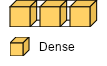

<IPython.core.display.Javascript object>

In [62]:
# Summarize the model
model_1.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_1, legend=True, font=font)

__Fit the data:__

In [63]:
%%time
history_1 = model_1.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=50,
                       verbose=2)

Epoch 1/50
200/200 - 1s - loss: 0.4729 - accuracy: 0.7928 - val_loss: 0.4239 - val_accuracy: 0.8144 - 990ms/epoch - 5ms/step
Epoch 2/50
200/200 - 1s - loss: 0.4074 - accuracy: 0.8227 - val_loss: 0.3904 - val_accuracy: 0.8400 - 660ms/epoch - 3ms/step
Epoch 3/50
200/200 - 1s - loss: 0.3761 - accuracy: 0.8406 - val_loss: 0.3679 - val_accuracy: 0.8487 - 655ms/epoch - 3ms/step
Epoch 4/50
200/200 - 1s - loss: 0.3566 - accuracy: 0.8506 - val_loss: 0.3551 - val_accuracy: 0.8587 - 654ms/epoch - 3ms/step
Epoch 5/50
200/200 - 1s - loss: 0.3490 - accuracy: 0.8553 - val_loss: 0.3539 - val_accuracy: 0.8537 - 650ms/epoch - 3ms/step
Epoch 6/50
200/200 - 1s - loss: 0.3440 - accuracy: 0.8569 - val_loss: 0.3530 - val_accuracy: 0.8519 - 652ms/epoch - 3ms/step
Epoch 7/50
200/200 - 1s - loss: 0.3407 - accuracy: 0.8581 - val_loss: 0.3512 - val_accuracy: 0.8525 - 651ms/epoch - 3ms/step
Epoch 8/50
200/200 - 1s - loss: 0.3394 - accuracy: 0.8556 - val_loss: 0.3504 - val_accuracy: 0.8525 - 648ms/epoch - 3ms/step


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8605


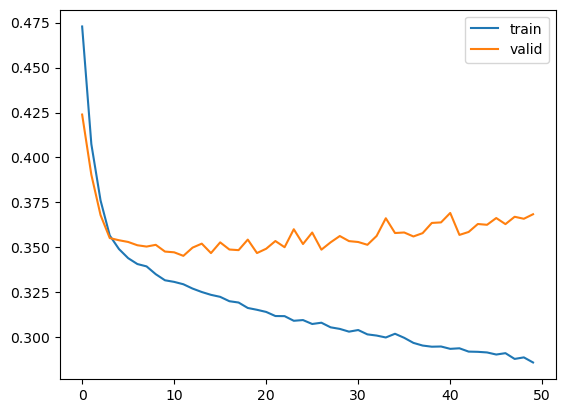

<IPython.core.display.Javascript object>

In [64]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_1.history)
hist["epoch"] = history_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = model_1.evaluate(X_test, y_test)

* __So, here we see overfitting - even with this very simple model - and just changing the optimizer. We'll try plotting and adjusting the threshold, and see how it performs.__

__Let's tune the threshold using ROC-AUC__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.125964, G-Mean=0.758


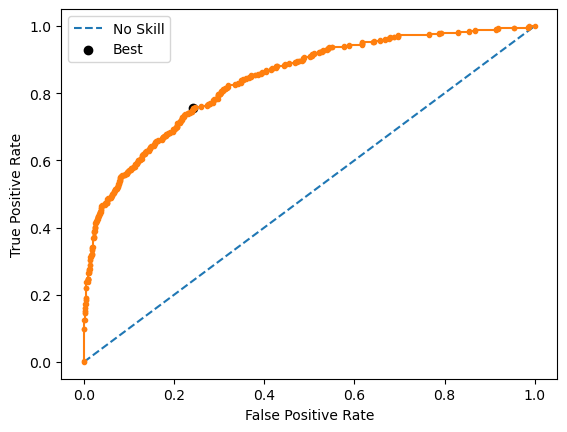

<IPython.core.display.Javascript object>

In [65]:
# predict probabilities
yhat1 = model_1.predict(X_test)

# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]

# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)

# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds1[ix], gmeans1[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [66]:
# Predicting the results using best value as a threshold
y_pred_e1 = model_1.predict(X_test)
y_pred_e1 = y_pred_e1 > thresholds1[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

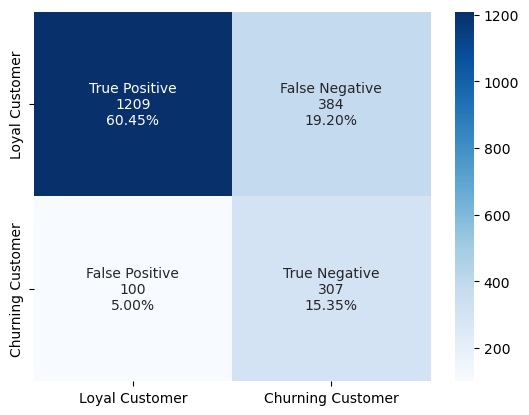

<IPython.core.display.Javascript object>

In [67]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e1)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

* __False Negatives are negligibly better in this model__

__Let's generate the classification report__

In [68]:
# Generate a classification report for these predictions
report_1 = metrics.classification_report(y_test, y_pred_e1)
print(report_1)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



<IPython.core.display.Javascript object>

__Very slight improvements in accuracy, and the recall score is a litte better.  We're still not there yet.__

### Model Improvement: Neural Network model with Dropout

***
With this model, we'll introduce dropout to ensure all the nodes are trained, and we'll also add some complexity with additional layers. We'll stick with the Adam optimizer.
***

In [69]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [70]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

In [71]:
# Initialize a more complex Neural Network Model , and introduce dropout
model_2 = Sequential()
model_2.add(Dense(activation="relu", input_dim=10, units=32))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [72]:
# Let's try a new optimizer here, with the default learning rate
optimizer = tf.keras.optimizers.Adam(0.001)
# Compile the model
model_2.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

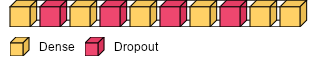

<IPython.core.display.Javascript object>

In [73]:
# Summarize the model
model_2.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_2, legend=True, font=font)

In [74]:
%%time
history_2 = model_2.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=50,
                       verbose=2)

Epoch 1/50
200/200 - 2s - loss: 0.5263 - accuracy: 0.7908 - val_loss: 0.4825 - val_accuracy: 0.7906 - 2s/epoch - 8ms/step
Epoch 2/50
200/200 - 1s - loss: 0.4712 - accuracy: 0.7975 - val_loss: 0.4452 - val_accuracy: 0.7906 - 1s/epoch - 6ms/step
Epoch 3/50
200/200 - 1s - loss: 0.4582 - accuracy: 0.7977 - val_loss: 0.4459 - val_accuracy: 0.7887 - 1s/epoch - 6ms/step
Epoch 4/50
200/200 - 1s - loss: 0.4488 - accuracy: 0.7992 - val_loss: 0.4324 - val_accuracy: 0.7925 - 1s/epoch - 6ms/step
Epoch 5/50
200/200 - 1s - loss: 0.4375 - accuracy: 0.8034 - val_loss: 0.4193 - val_accuracy: 0.8319 - 1s/epoch - 6ms/step
Epoch 6/50
200/200 - 1s - loss: 0.4341 - accuracy: 0.8072 - val_loss: 0.4185 - val_accuracy: 0.8319 - 1s/epoch - 6ms/step
Epoch 7/50
200/200 - 1s - loss: 0.4263 - accuracy: 0.8105 - val_loss: 0.4064 - val_accuracy: 0.8425 - 1s/epoch - 6ms/step
Epoch 8/50
200/200 - 1s - loss: 0.4076 - accuracy: 0.8180 - val_loss: 0.3880 - val_accuracy: 0.8506 - 1s/epoch - 6ms/step
Epoch 9/50
200/200 - 1s 

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8625


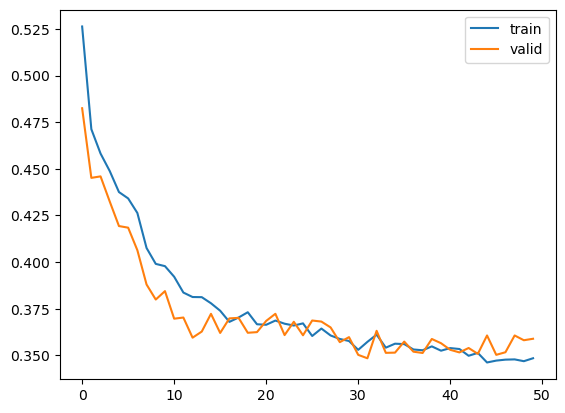

<IPython.core.display.Javascript object>

In [75]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_2.history)
hist["epoch"] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = model_2.evaluate(X_test, y_test)

* __So, here we see  overfitting and noise, but an impressive result. We'll try plotting and adjusting the threshold, and see how it performs.__

__Let's tune the threshold using ROC-AUC__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.205377, G-Mean=0.765


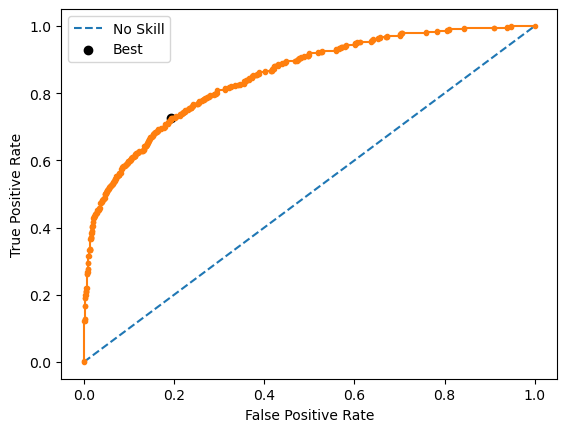

<IPython.core.display.Javascript object>

In [76]:
# predict probabilities
yhat2 = model_2.predict(X_test)

# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]

# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)

# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds2[ix], gmeans2[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [77]:
# Predicting the results using best value as a threshold
y_pred_e2 = model_2.predict(X_test)
y_pred_e2 = y_pred_e2 > thresholds2[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

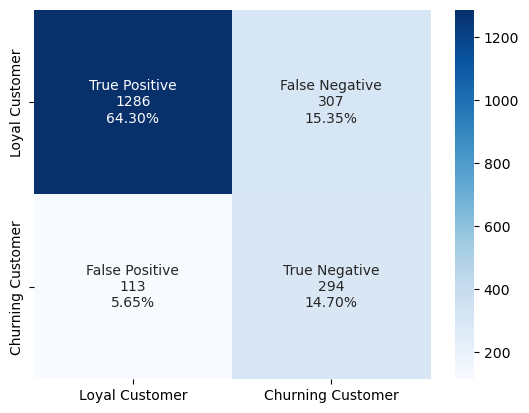

<IPython.core.display.Javascript object>

In [78]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e2)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

* __False Negatives are just slightly worse in this model__

__Let's see how the classification report looks__

In [79]:
# Generate a classification report for these predictions
report_2 = metrics.classification_report(y_test, y_pred_e2)
print(report_2)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



<IPython.core.display.Javascript object>

__About the same results with this model.  I had higher hopes for the impact of introducing Dropout.__

### Model Improvement: Neural Network model with Hyperparameter tuning

***
Next up, we'll try GridSearch to test out various combinations of hyperparameters. There are a number of hyperparameters that might be interesting to explore; in this section we'll look at options for optimizers, batch size, and learning rate.
***

In [80]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [81]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

__We begin by defining a function to build - and compile - our model with the inputs we intend to explore enumerated to be passed into the function__

In [82]:
def create_model_3(lr, batch_size, optimizer):
    model_3 = Sequential()
    model_3.add(Dense(activation="relu", input_dim=10, units=32))
    model_3.add(Dropout(0.2))
    model_3.add(Dense(64, activation="relu"))
    model_3.add(Dropout(0.5))
    model_3.add(Dense(32, activation="relu"))
    model_3.add(Dense(1, activation="sigmoid"))

    # Get the optimizer class dynamically using getattr
    optimizer_class = getattr(tf.keras.optimizers, optimizer)

    # compile model
    optimizer_option = optimizer_class(learning_rate=lr)

    model_3.compile(
        optimizer=optimizer_option, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model_3

<IPython.core.display.Javascript object>

__Here's our wrapper for the GridSearch__

In [83]:
keras_estimator = KerasClassifier(build_fn=create_model_3, verbose=1)
# define the grid search parameters
param_grid = {
    "batch_size": [32, 64, 128, 256],
    "lr": [0.01, 0.001],
    "optimizer": ["SGD", "Adam", "RMSprop"],
}

# cross-validation folds
kfold_splits = 5

# hyperparameter grid to explore
grid = GridSearchCV(
    estimator=keras_estimator,
    verbose=2,
    cv=kfold_splits,
    param_grid=param_grid,
    n_jobs=1,
)

<IPython.core.display.Javascript object>

#### Fit the data:

In [84]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train, validation_split=0.2, verbose=2)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
160/160 - 1s - loss: 0.5444 - accuracy: 0.7928 - val_loss: 0.5178 - val_accuracy: 0.7914 - 955ms/epoch - 6ms/step
50/50 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.8087
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.1s
160/160 - 1s - loss: 0.6452 - accuracy: 0.6574 - val_loss: 0.5207 - val_accuracy: 0.7914 - 937ms/epoch - 6ms/step
50/50 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7825
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.1s
160/160 - 1s - loss: 0.5626 - accuracy: 0.7482 - val_loss: 0.5005 - val_accuracy: 0.7914 - 932ms/epoch - 6ms/step
50/50 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8106
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.0s
160/160 - 1s - loss: 0.5407 - accuracy: 0.7949 - val_loss: 0.5149 - val_accuracy: 0.7914 - 9

50/50 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7906
[CV] END .........batch_size=32, lr=0.001, optimizer=RMSprop; total time=   1.3s
80/80 - 1s - loss: 0.6298 - accuracy: 0.6836 - val_loss: 0.5615 - val_accuracy: 0.7914 - 661ms/epoch - 8ms/step
25/25 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8087
[CV] END ..............batch_size=64, lr=0.01, optimizer=SGD; total time=   0.7s
80/80 - 1s - loss: 0.5986 - accuracy: 0.7156 - val_loss: 0.5253 - val_accuracy: 0.7914 - 639ms/epoch - 8ms/step
25/25 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7825
[CV] END ..............batch_size=64, lr=0.01, optimizer=SGD; total time=   0.7s
80/80 - 1s - loss: 0.6530 - accuracy: 0.6271 - val_loss: 0.5531 - val_accuracy: 0.7914 - 633ms/epoch - 8ms/step
25/25 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8106
[CV] END ..............batch_size=64, lr=0.01, optimizer=SGD; total time=

13/13 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.8106
[CV] END ........batch_size=128, lr=0.001, optimizer=RMSprop; total time=   0.8s
40/40 - 1s - loss: 0.5160 - accuracy: 0.7789 - val_loss: 0.4660 - val_accuracy: 0.7914 - 662ms/epoch - 17ms/step
13/13 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7894
[CV] END ........batch_size=128, lr=0.001, optimizer=RMSprop; total time=   0.8s
40/40 - 1s - loss: 0.6027 - accuracy: 0.6914 - val_loss: 0.5034 - val_accuracy: 0.7836 - 657ms/epoch - 16ms/step
13/13 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7906
[CV] END ........batch_size=128, lr=0.001, optimizer=RMSprop; total time=   0.8s
20/20 - 0s - loss: 0.6750 - accuracy: 0.5822 - val_loss: 0.6175 - val_accuracy: 0.7633 - 406ms/epoch - 20ms/step
7/7 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7700
[CV] END .............batch_size=256, lr=0.01, optimizer=SGD; total time

20/20 - 1s - loss: 0.5980 - accuracy: 0.7074 - val_loss: 0.5062 - val_accuracy: 0.7914 - 633ms/epoch - 32ms/step
7/7 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8106
[CV] END ........batch_size=256, lr=0.001, optimizer=RMSprop; total time=   0.7s
20/20 - 1s - loss: 0.5427 - accuracy: 0.7881 - val_loss: 0.4975 - val_accuracy: 0.7914 - 582ms/epoch - 29ms/step
7/7 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7887
[CV] END ........batch_size=256, lr=0.001, optimizer=RMSprop; total time=   0.7s
20/20 - 1s - loss: 0.5356 - accuracy: 0.7854 - val_loss: 0.5131 - val_accuracy: 0.7836 - 573ms/epoch - 29ms/step
7/7 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7906
[CV] END ........batch_size=256, lr=0.001, optimizer=RMSprop; total time=   0.7s
200/200 - 1s - loss: 0.4550 - accuracy: 0.8089 - val_loss: 0.3864 - val_accuracy: 0.8225 - 1s/epoch - 7ms/step
Best: 0.821250 using {'batch_size': 32, 'lr': 0.01, 

<IPython.core.display.Javascript object>

#### Results
***

__Our optimal model may vary from run to run, so we'll capture the `grid_result_best_params` dynamically to use in the next step__


__We explored three variables: batch size, learning rate, and optimizer. The base model included Dropout.__

__Let's build a new model with this optimal configuration__

In [85]:
best_batch_size = grid_result.best_params_["batch_size"]
best_optimizer = grid_result.best_params_["optimizer"]
best_learning_rate = grid_result.best_params_["lr"]

optimizer_class = getattr(tf.keras.optimizers, best_optimizer)
optimizer_option = optimizer_class(learning_rate=best_learning_rate)

<IPython.core.display.Javascript object>

In [86]:
estimator_3 = create_model_3(best_learning_rate, best_batch_size, best_optimizer)

<IPython.core.display.Javascript object>

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_484 (Dense)           (None, 32)                352       
                                                                 
 dropout_242 (Dropout)       (None, 32)                0         
                                                                 
 dense_485 (Dense)           (None, 64)                2112      
                                                                 
 dropout_243 (Dropout)       (None, 64)                0         
                                                                 
 dense_486 (Dense)           (None, 32)                2080      
                                                                 
 dense_487 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,577
Trainable params: 4,577
Non-trai

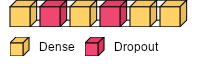

<IPython.core.display.Javascript object>

In [87]:
# Summarize the model
estimator_3.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(estimator_3, legend=True, font=font)

#### Fit the data:

In [88]:
%%time

history_3 = estimator_3.fit(
    X_train, y_train, epochs=50, batch_size=best_batch_size, verbose=2, validation_split=0.2
)

Epoch 1/50
200/200 - 1s - loss: 0.4624 - accuracy: 0.8034 - val_loss: 0.4077 - val_accuracy: 0.8325 - 1s/epoch - 7ms/step
Epoch 2/50
200/200 - 1s - loss: 0.4087 - accuracy: 0.8352 - val_loss: 0.3811 - val_accuracy: 0.8431 - 994ms/epoch - 5ms/step
Epoch 3/50
200/200 - 1s - loss: 0.3974 - accuracy: 0.8395 - val_loss: 0.3727 - val_accuracy: 0.8487 - 981ms/epoch - 5ms/step
Epoch 4/50
200/200 - 1s - loss: 0.3949 - accuracy: 0.8427 - val_loss: 0.3686 - val_accuracy: 0.8500 - 982ms/epoch - 5ms/step
Epoch 5/50
200/200 - 1s - loss: 0.3856 - accuracy: 0.8441 - val_loss: 0.3752 - val_accuracy: 0.8444 - 973ms/epoch - 5ms/step
Epoch 6/50
200/200 - 1s - loss: 0.3825 - accuracy: 0.8442 - val_loss: 0.3705 - val_accuracy: 0.8475 - 980ms/epoch - 5ms/step
Epoch 7/50
200/200 - 1s - loss: 0.3809 - accuracy: 0.8497 - val_loss: 0.3773 - val_accuracy: 0.8388 - 980ms/epoch - 5ms/step
Epoch 8/50
200/200 - 1s - loss: 0.3830 - accuracy: 0.8497 - val_loss: 0.3579 - val_accuracy: 0.8544 - 1s/epoch - 5ms/step
Epoch 

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8515


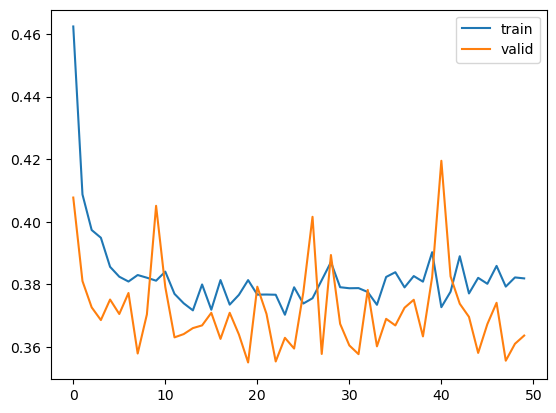

<IPython.core.display.Javascript object>

In [89]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_3.history)
hist["epoch"] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = estimator_3.evaluate(X_test, y_test)

* __We've got some overfitting and noise, and a less than impressive result. We'll try plotting and adjusting the threshold, and see how it performs.__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.224325, G-Mean=0.757


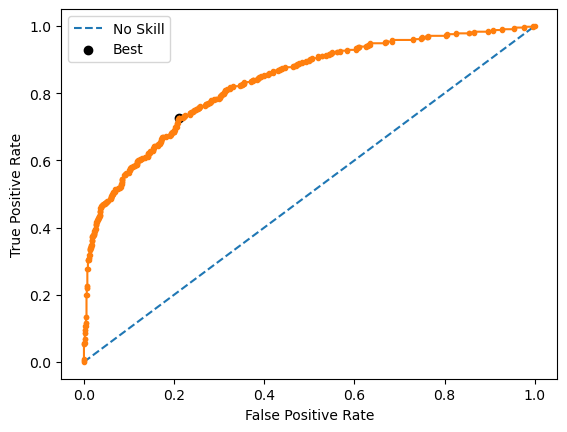

<IPython.core.display.Javascript object>

In [90]:
# predict probabilities
yhat3 = estimator_3.predict(X_test)

# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]

# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)

# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds3[ix], gmeans3[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [91]:
# Predicting the results using best value as a threshold
y_pred_e3 = estimator_3.predict(X_test)
y_pred_e3 = y_pred_e3 > thresholds3[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

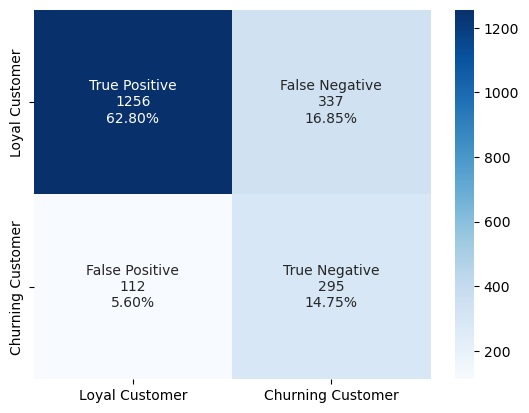

<IPython.core.display.Javascript object>

In [92]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e3)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

__So far, our best false negative rate,  after our fairly wide-ranging grid search__

__Let's see how the classification report shapes up__

In [93]:
# Generate a classification report for these predictions
report_3 = metrics.classification_report(y_test, y_pred_e3)
print(report_3)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



<IPython.core.display.Javascript object>

__Some improvement over the last model, this is our most consistent result for recall and accuracy. Good average prediction, but pretty poor for our churning customers.__

### Model Improvement: Neural Network model with balanced data

__We've been exploring various models and parameters with the full knowledge that our data is not at all balanced, and that our churning customers are substantially under-represented in the data set.  We'll use the Synthetic Minority Over-sampling Technique to balance the data, and then re-run our grid search exploration to see if that makes a difference.__

In [94]:
##Applying SMOTE on train and test
smote = SMOTE(sampling_strategy="not majority")
X_smote, y_smote = smote.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

__Verify our new class distribution in the resampled data__

In [95]:
y_train_resampled_df = pd.DataFrame(y_smote, columns=["Exited"])
class_counts_resampled = y_train_resampled_df["Exited"].value_counts()
print("Class Distribution (Resampled):")
print(class_counts_resampled)

Class Distribution (Resampled):
0    6370
1    6370
Name: Exited, dtype: int64


<IPython.core.display.Javascript object>

In [96]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(33)
random.seed(33)
tf.random.set_seed(33)

<IPython.core.display.Javascript object>

In [97]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

__Our model build and compile function that will be called with our parameters__

In [98]:
def create_model_4(lr, batch_size, optimizer):
    model_4 = Sequential()
    model_4.add(Dense(activation="relu", input_dim=10, units=32))
    model_4.add(Dropout(0.2))
    model_4.add(Dense(32, activation="relu"))
    model_4.add(Dropout(0.5))
    model_4.add(Dense(32, activation="relu"))
    model_4.add(Dense(1, activation="sigmoid"))

    # Get the optimizer class dynamically using getattr
    optimizer_class = getattr(tf.keras.optimizers, optimizer)

    # compile model
    optimizer_option = optimizer_class(learning_rate=lr)

    model_4.compile(
        optimizer=optimizer_option, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model_4

<IPython.core.display.Javascript object>

__Here's our wrapper for the GridSearch__

In [99]:
keras_estimator = KerasClassifier(build_fn=create_model_4, verbose=1)
# define the grid search parameters
param_grid = {
    "batch_size": [32, 64, 128, 256],
    "lr": [0.01, 0.001],
    "optimizer": ["SGD", "Adam", "RMSprop"],
}

# cross-validation folds
kfold_splits = 3

# hyperparameter grid to explore
grid = GridSearchCV(
    estimator=keras_estimator,
    verbose=2,
    cv=kfold_splits,
    param_grid=param_grid,
    n_jobs=1,
)

<IPython.core.display.Javascript object>

#### Fit the data:

In [100]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_smote, y_smote, validation_split=0.2, verbose=2)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
213/213 - 1s - loss: 0.6896 - accuracy: 0.5655 - val_loss: 0.5972 - val_accuracy: 0.8911 - 1s/epoch - 6ms/step
133/133 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.3885
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.5s
213/213 - 1s - loss: 0.7004 - accuracy: 0.5096 - val_loss: 0.6574 - val_accuracy: 0.7069 - 1s/epoch - 6ms/step
133/133 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5173
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.5s
213/213 - 1s - loss: 0.5854 - accuracy: 0.7285 - val_loss: 0.7435 - val_accuracy: 0.5621 - 1s/epoch - 6ms/step
133/133 [==============================] - 0s 2ms/step - loss: 1.3263 - accuracy: 0.0000e+00
[CV] END ..............batch_size=32, lr=0.01, optimizer=SGD; total time=   1.5s
213/213 - 1s - loss: 0.5705 - accuracy: 0.7058 - val_loss: 0.3517 - val_accuracy: 0.8258 - 1

107/107 - 1s - loss: 0.7785 - accuracy: 0.3254 - val_loss: 0.6983 - val_accuracy: 0.4974 - 808ms/epoch - 8ms/step
67/67 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6265
[CV] END .............batch_size=64, lr=0.001, optimizer=SGD; total time=   1.0s
107/107 - 1s - loss: 0.6652 - accuracy: 0.6029 - val_loss: 0.4720 - val_accuracy: 0.9041 - 871ms/epoch - 8ms/step
67/67 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.5062
[CV] END ............batch_size=64, lr=0.001, optimizer=Adam; total time=   1.0s
107/107 - 1s - loss: 0.6632 - accuracy: 0.5988 - val_loss: 0.5686 - val_accuracy: 0.7781 - 872ms/epoch - 8ms/step
67/67 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6732
[CV] END ............batch_size=64, lr=0.001, optimizer=Adam; total time=   1.0s
107/107 - 1s - loss: 0.5421 - accuracy: 0.7866 - val_loss: 0.7229 - val_accuracy: 0.5621 - 869ms/epoch - 8ms/step
67/67 [==============================] -

17/17 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7134
[CV] END ............batch_size=256, lr=0.01, optimizer=Adam; total time=   0.6s
27/27 - 1s - loss: 0.5242 - accuracy: 0.7722 - val_loss: 0.7138 - val_accuracy: 0.5621 - 898ms/epoch - 33ms/step
17/17 [==============================] - 0s 2ms/step - loss: 1.3682 - accuracy: 0.0000e+00
[CV] END ............batch_size=256, lr=0.01, optimizer=Adam; total time=   0.9s
27/27 - 1s - loss: 0.5973 - accuracy: 0.6750 - val_loss: 0.4061 - val_accuracy: 0.8493 - 659ms/epoch - 24ms/step
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6864
[CV] END .........batch_size=256, lr=0.01, optimizer=RMSprop; total time=   0.7s
27/27 - 1s - loss: 0.6240 - accuracy: 0.6623 - val_loss: 0.4466 - val_accuracy: 0.8275 - 663ms/epoch - 25ms/step
17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7040
[CV] END .........batch_size=256, lr=0.01, optimizer=RMSprop; tota

<IPython.core.display.Javascript object>

#### Results
***

__Our optimal model may vary from run to run, so we'll capture the `grid_result_best_params` dynamically to use in the next step__


__We explored three variables: batch size, learning rate, and optimizer. The base model included Dropout.__

__Let's build a new model with this optimal configuration__

In [101]:
best_batch_size = grid_result.best_params_["batch_size"]
best_optimizer = grid_result.best_params_["optimizer"]
best_learning_rate = grid_result.best_params_["lr"]

optimizer_class = getattr(tf.keras.optimizers, best_optimizer)
optimizer_option = optimizer_class(learning_rate=best_learning_rate)

<IPython.core.display.Javascript object>

In [102]:
estimator_4 = create_model_4(best_learning_rate, best_batch_size, best_optimizer)

<IPython.core.display.Javascript object>

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_292 (Dense)           (None, 32)                352       
                                                                 
 dropout_146 (Dropout)       (None, 32)                0         
                                                                 
 dense_293 (Dense)           (None, 32)                1056      
                                                                 
 dropout_147 (Dropout)       (None, 32)                0         
                                                                 
 dense_294 (Dense)           (None, 32)                1056      
                                                                 
 dense_295 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-train

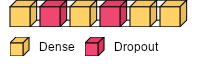

<IPython.core.display.Javascript object>

In [103]:
# summarize the model
estimator_4.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(estimator_4, legend=True, font=font)

#### Fit the data:

In [104]:
%%time

history_4 = estimator_4.fit(
    X_smote, y_smote, epochs=100, batch_size=best_batch_size, verbose=2, validation_split=0.2
)

Epoch 1/100
319/319 - 2s - loss: 0.5356 - accuracy: 0.7321 - val_loss: 0.6422 - val_accuracy: 0.5836 - 2s/epoch - 7ms/step
Epoch 2/100
319/319 - 2s - loss: 0.4848 - accuracy: 0.7746 - val_loss: 0.5280 - val_accuracy: 0.7076 - 2s/epoch - 5ms/step
Epoch 3/100
319/319 - 2s - loss: 0.4733 - accuracy: 0.7807 - val_loss: 0.5266 - val_accuracy: 0.6872 - 2s/epoch - 5ms/step
Epoch 4/100
319/319 - 2s - loss: 0.4665 - accuracy: 0.7893 - val_loss: 0.5715 - val_accuracy: 0.6330 - 2s/epoch - 5ms/step
Epoch 5/100
319/319 - 2s - loss: 0.4598 - accuracy: 0.7933 - val_loss: 0.5499 - val_accuracy: 0.6856 - 2s/epoch - 5ms/step
Epoch 6/100
319/319 - 2s - loss: 0.4621 - accuracy: 0.7923 - val_loss: 0.5611 - val_accuracy: 0.6829 - 2s/epoch - 5ms/step
Epoch 7/100
319/319 - 2s - loss: 0.4551 - accuracy: 0.7995 - val_loss: 0.5629 - val_accuracy: 0.7033 - 2s/epoch - 5ms/step
Epoch 8/100
319/319 - 2s - loss: 0.4592 - accuracy: 0.7970 - val_loss: 0.5417 - val_accuracy: 0.6703 - 2s/epoch - 5ms/step
Epoch 9/100
319/

Epoch 68/100
319/319 - 2s - loss: 0.4612 - accuracy: 0.8026 - val_loss: 0.8132 - val_accuracy: 0.6138 - 2s/epoch - 5ms/step
Epoch 69/100
319/319 - 2s - loss: 0.4594 - accuracy: 0.8018 - val_loss: 0.6363 - val_accuracy: 0.6146 - 2s/epoch - 5ms/step
Epoch 70/100
319/319 - 2s - loss: 0.4564 - accuracy: 0.7993 - val_loss: 0.6320 - val_accuracy: 0.6503 - 2s/epoch - 5ms/step
Epoch 71/100
319/319 - 2s - loss: 0.4659 - accuracy: 0.8001 - val_loss: 0.5653 - val_accuracy: 0.7017 - 2s/epoch - 5ms/step
Epoch 72/100
319/319 - 2s - loss: 0.4608 - accuracy: 0.8010 - val_loss: 0.5149 - val_accuracy: 0.7316 - 2s/epoch - 5ms/step
Epoch 73/100
319/319 - 2s - loss: 0.4639 - accuracy: 0.8014 - val_loss: 0.5096 - val_accuracy: 0.7159 - 2s/epoch - 5ms/step
Epoch 74/100
319/319 - 2s - loss: 0.4691 - accuracy: 0.7987 - val_loss: 0.4411 - val_accuracy: 0.7445 - 2s/epoch - 5ms/step
Epoch 75/100
319/319 - 2s - loss: 0.4565 - accuracy: 0.8041 - val_loss: 0.5371 - val_accuracy: 0.7021 - 2s/epoch - 5ms/step
Epoch 76

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8140


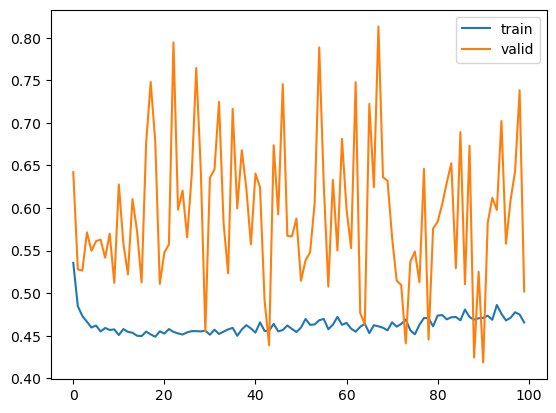

<IPython.core.display.Javascript object>

In [105]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_4.history)
hist["epoch"] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = estimator_4.evaluate(X_test, y_test)

__Pretty substantial noise and loss in this model__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.301785, G-Mean=0.764


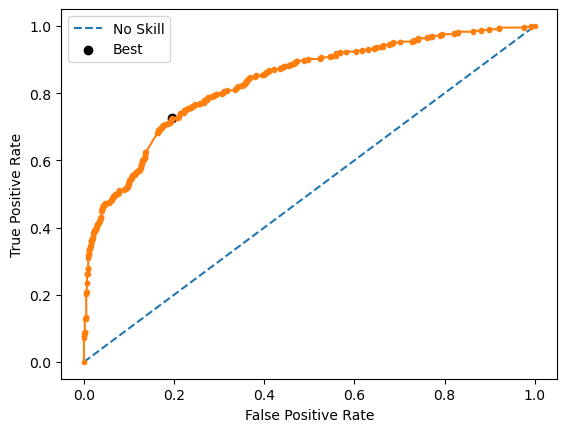

<IPython.core.display.Javascript object>

In [106]:
# predict probabilities
yhat4 = estimator_4.predict(X_test)

# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]

# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)

# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds4[ix], gmeans4[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [107]:
# Predicting the results using best value as a threshold
y_pred_e4 = estimator_4.predict(X_test)
y_pred_e4 = y_pred_e4 > thresholds4[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

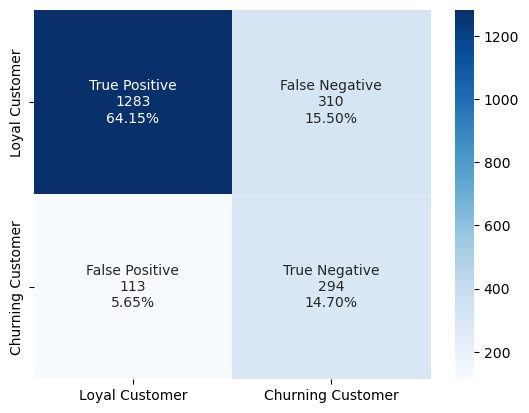

<IPython.core.display.Javascript object>

In [108]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e4)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

__I'm still disappointed in the FN rate; I feel like we should be able to tune something better__

__Let's see how the classification report shapes up__

In [109]:
# Generate a classification report for these predictions
report_4 = metrics.classification_report(y_test, y_pred_e4)
print(report_4)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



<IPython.core.display.Javascript object>

## Final Model

__We'll keep the balanced training data here, and vary some of the options in our grid search to see if we can produce a more useful result__

In [110]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [111]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

In [112]:
def create_model_5(lr, batch_size, optimizer):
    model_5 = Sequential()
    model_5.add(Dense(activation="relu", input_dim=10, units=32))
    model_5.add(Dropout(0.2))
    model_5.add(Dense(32, activation="relu"))
    model_5.add(Dropout(0.5))
    model_5.add(Dense(32, activation="relu"))
    model_5.add(Dropout(0.5))
    model_5.add(Dense(32, activation="relu"))
    model_5.add(Dense(1, activation="sigmoid"))

    # Get the optimizer class dynamically using getattr
    optimizer_class = getattr(tf.keras.optimizers, optimizer)

    # compile model
    optimizer_option = optimizer_class(learning_rate=lr)

    model_5.compile(
        optimizer=optimizer_option, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model_5

<IPython.core.display.Javascript object>

In [113]:
keras_estimator = KerasClassifier(build_fn=create_model_5, verbose=1)
# define the grid search parameters
param_grid = {
    "batch_size": [128, 256, 512],
    "lr": [0.01, 0.001],
    "optimizer": ["SGD", "Adam", "RMSprop"],
}

# cross-validation folds
kfold_splits = 5

# hyperparameter grid to explore
grid = GridSearchCV(
    estimator=keras_estimator,
    verbose=2,
    cv=kfold_splits,
    param_grid=param_grid,
    n_jobs=1,
)

<IPython.core.display.Javascript object>

#### Fit the data

In [114]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_smote, y_smote, validation_split=0.2, verbose=2)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
64/64 - 1s - loss: 0.7235 - accuracy: 0.5214 - val_loss: 0.7313 - val_accuracy: 0.3173 - 720ms/epoch - 11ms/step
20/20 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6370
[CV] END .............batch_size=128, lr=0.01, optimizer=SGD; total time=   0.8s
64/64 - 1s - loss: 0.7023 - accuracy: 0.5259 - val_loss: 0.7185 - val_accuracy: 0.4139 - 713ms/epoch - 11ms/step
20/20 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6036
[CV] END .............batch_size=128, lr=0.01, optimizer=SGD; total time=   1.0s
64/64 - 1s - loss: 0.7061 - accuracy: 0.5047 - val_loss: 0.6694 - val_accuracy: 0.7518 - 726ms/epoch - 11ms/step
20/20 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.3960
[CV] END .............batch_size=128, lr=0.01, optimizer=SGD; total time=   0.8s
64/64 - 1s - loss: 0.6762 - accuracy: 0.5950 - val_loss: 0.8301 - val_accuracy: 9.8087e-04 - 710

64/64 - 1s - loss: 0.5408 - accuracy: 0.7776 - val_loss: 1.0863 - val_accuracy: 0.0000e+00 - 959ms/epoch - 15ms/step
20/20 [==============================] - 0s 2ms/step - loss: 1.0926 - accuracy: 0.0000e+00
[CV] END ........batch_size=128, lr=0.001, optimizer=RMSprop; total time=   1.0s
32/32 - 1s - loss: 0.7081 - accuracy: 0.5099 - val_loss: 0.7356 - val_accuracy: 0.2791 - 579ms/epoch - 18ms/step
10/10 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6378
[CV] END .............batch_size=256, lr=0.01, optimizer=SGD; total time=   0.6s
32/32 - 1s - loss: 0.7063 - accuracy: 0.4926 - val_loss: 0.6748 - val_accuracy: 0.6395 - 577ms/epoch - 18ms/step
10/10 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.4525
[CV] END .............batch_size=256, lr=0.01, optimizer=SGD; total time=   0.6s
32/32 - 1s - loss: 0.6989 - accuracy: 0.5118 - val_loss: 0.6885 - val_accuracy: 0.5596 - 578ms/epoch - 18ms/step
10/10 [=============================

32/32 - 1s - loss: 0.6019 - accuracy: 0.7145 - val_loss: 1.1052 - val_accuracy: 0.0000e+00 - 778ms/epoch - 24ms/step
10/10 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.1119
[CV] END ........batch_size=256, lr=0.001, optimizer=RMSprop; total time=   0.8s
32/32 - 1s - loss: 0.5878 - accuracy: 0.7439 - val_loss: 1.1778 - val_accuracy: 0.0000e+00 - 791ms/epoch - 25ms/step
10/10 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.0000e+00
[CV] END ........batch_size=256, lr=0.001, optimizer=RMSprop; total time=   0.8s
16/16 - 1s - loss: 0.7322 - accuracy: 0.5025 - val_loss: 0.7092 - val_accuracy: 0.4674 - 514ms/epoch - 32ms/step
5/5 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4827
[CV] END .............batch_size=512, lr=0.01, optimizer=SGD; total time=   0.5s
16/16 - 1s - loss: 0.7171 - accuracy: 0.5228 - val_loss: 0.8044 - val_accuracy: 0.0280 - 519ms/epoch - 32ms/step
5/5 [=============================

5/5 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5424
[CV] END ........batch_size=512, lr=0.001, optimizer=RMSprop; total time=   0.7s
16/16 - 1s - loss: 0.5778 - accuracy: 0.7449 - val_loss: 1.0138 - val_accuracy: 0.0000e+00 - 693ms/epoch - 43ms/step
5/5 [==============================] - 0s 2ms/step - loss: 0.9439 - accuracy: 0.1119
[CV] END ........batch_size=512, lr=0.001, optimizer=RMSprop; total time=   0.7s
16/16 - 1s - loss: 0.5896 - accuracy: 0.7347 - val_loss: 1.0463 - val_accuracy: 0.0000e+00 - 698ms/epoch - 44ms/step
5/5 [==============================] - 0s 3ms/step - loss: 1.0490 - accuracy: 0.0000e+00
[CV] END ........batch_size=512, lr=0.001, optimizer=RMSprop; total time=   0.7s
80/80 - 1s - loss: 0.5759 - accuracy: 0.6982 - val_loss: 0.6996 - val_accuracy: 0.6362 - 1s/epoch - 13ms/step
Best: 0.573940 using {'batch_size': 128, 'lr': 0.01, 'optimizer': 'RMSprop'}
Total runtime of the program is 80.2003653049469


<IPython.core.display.Javascript object>

#### Results
***

__Our optimal model may vary from run to run, so we'll capture the `grid_result_best_params` dynamically to use in the next step__


__We explored three variables: batch size, learning rate, and optimizer. The base model includes Dropout.__

__Let's build a new model with this optimal configuration__

In [115]:
best_batch_size = grid_result.best_params_["batch_size"]
best_optimizer = grid_result.best_params_["optimizer"]
best_learning_rate = grid_result.best_params_["lr"]

optimizer_class = getattr(tf.keras.optimizers, best_optimizer)
optimizer_option = optimizer_class(learning_rate=best_learning_rate)

<IPython.core.display.Javascript object>

In [116]:
estimator_5 = create_model_5(best_learning_rate, best_batch_size, best_optimizer)

<IPython.core.display.Javascript object>

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_455 (Dense)           (None, 32)                352       
                                                                 
 dropout_273 (Dropout)       (None, 32)                0         
                                                                 
 dense_456 (Dense)           (None, 32)                1056      
                                                                 
 dropout_274 (Dropout)       (None, 32)                0         
                                                                 
 dense_457 (Dense)           (None, 32)                1056      
                                                                 
 dropout_275 (Dropout)       (None, 32)                0         
                                                                 
 dense_458 (Dense)           (None, 32)              

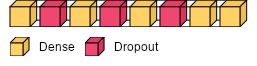

<IPython.core.display.Javascript object>

In [117]:
# summarize the model
estimator_5.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(estimator_5, legend=True, font=font)

In [118]:
%%time
history_5 = estimator_5.fit(
    X_smote, y_smote, epochs=100, batch_size=best_batch_size, verbose=2, validation_split=0.2
)

Epoch 1/100
80/80 - 1s - loss: 0.5689 - accuracy: 0.7008 - val_loss: 0.7263 - val_accuracy: 0.5844 - 1s/epoch - 13ms/step
Epoch 2/100
80/80 - 0s - loss: 0.5033 - accuracy: 0.7546 - val_loss: 0.5310 - val_accuracy: 0.7359 - 451ms/epoch - 6ms/step
Epoch 3/100
80/80 - 0s - loss: 0.4819 - accuracy: 0.7800 - val_loss: 0.7069 - val_accuracy: 0.6586 - 447ms/epoch - 6ms/step
Epoch 4/100
80/80 - 0s - loss: 0.4681 - accuracy: 0.7869 - val_loss: 0.4947 - val_accuracy: 0.7469 - 446ms/epoch - 6ms/step
Epoch 5/100
80/80 - 0s - loss: 0.4631 - accuracy: 0.7863 - val_loss: 0.7145 - val_accuracy: 0.5950 - 445ms/epoch - 6ms/step
Epoch 6/100
80/80 - 0s - loss: 0.4562 - accuracy: 0.7916 - val_loss: 0.6178 - val_accuracy: 0.7386 - 447ms/epoch - 6ms/step
Epoch 7/100
80/80 - 0s - loss: 0.4545 - accuracy: 0.7937 - val_loss: 0.7018 - val_accuracy: 0.6900 - 449ms/epoch - 6ms/step
Epoch 8/100
80/80 - 0s - loss: 0.4553 - accuracy: 0.7988 - val_loss: 0.6461 - val_accuracy: 0.7127 - 448ms/epoch - 6ms/step
Epoch 9/10

Epoch 67/100
80/80 - 0s - loss: 0.4336 - accuracy: 0.8089 - val_loss: 0.5072 - val_accuracy: 0.7602 - 456ms/epoch - 6ms/step
Epoch 68/100
80/80 - 0s - loss: 0.4330 - accuracy: 0.8094 - val_loss: 0.7347 - val_accuracy: 0.6413 - 455ms/epoch - 6ms/step
Epoch 69/100
80/80 - 0s - loss: 0.4366 - accuracy: 0.8067 - val_loss: 0.6443 - val_accuracy: 0.7100 - 449ms/epoch - 6ms/step
Epoch 70/100
80/80 - 0s - loss: 0.4385 - accuracy: 0.8082 - val_loss: 0.6164 - val_accuracy: 0.7186 - 489ms/epoch - 6ms/step
Epoch 71/100
80/80 - 0s - loss: 0.4347 - accuracy: 0.8112 - val_loss: 0.5821 - val_accuracy: 0.6986 - 465ms/epoch - 6ms/step
Epoch 72/100
80/80 - 0s - loss: 0.4366 - accuracy: 0.8044 - val_loss: 0.5286 - val_accuracy: 0.7100 - 463ms/epoch - 6ms/step
Epoch 73/100
80/80 - 0s - loss: 0.4336 - accuracy: 0.8081 - val_loss: 0.6071 - val_accuracy: 0.6805 - 456ms/epoch - 6ms/step
Epoch 74/100
80/80 - 0s - loss: 0.4361 - accuracy: 0.8093 - val_loss: 0.5163 - val_accuracy: 0.7123 - 455ms/epoch - 6ms/step


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7910


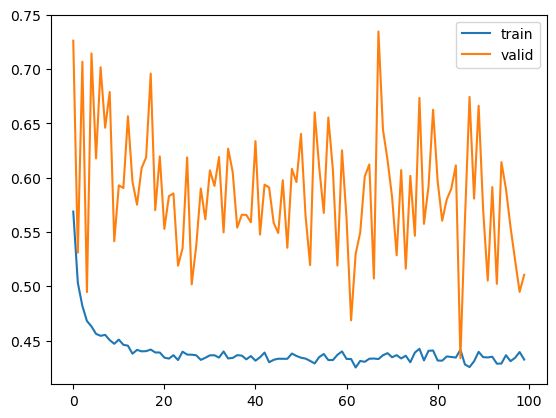

<IPython.core.display.Javascript object>

In [119]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_5.history)
hist["epoch"] = history_5.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = estimator_5.evaluate(X_test, y_test)

__This is showing high loss rates, and significant noise__

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.419765, G-Mean=0.752


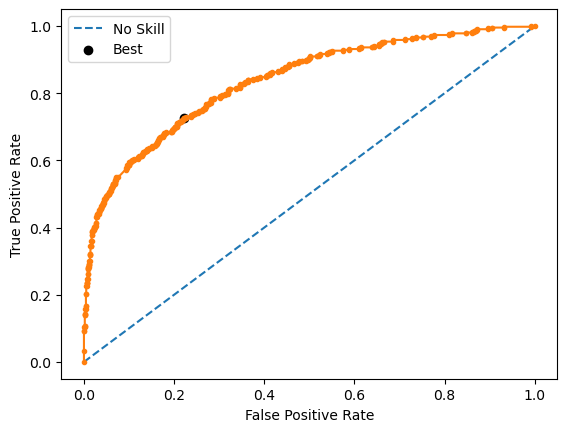

<IPython.core.display.Javascript object>

In [120]:
# predict probabilities
yhat5 = estimator_5.predict(X_test)

# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]

# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)

# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds5[ix], gmeans5[ix]))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".")
plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")

# axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# show the plot
plt.show()

In [121]:
# Predicting the results using best value as a threshold
y_pred_e5 = estimator_5.predict(X_test)
y_pred_e5 = y_pred_e5 > thresholds5[ix]

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

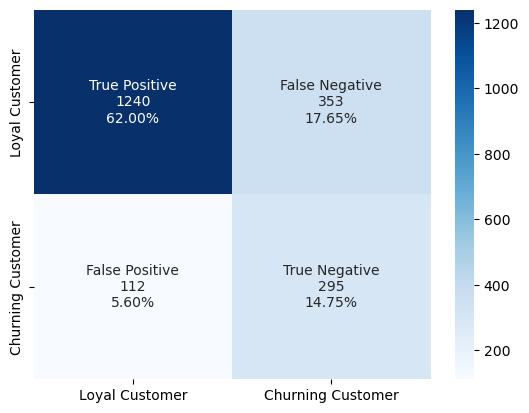

<IPython.core.display.Javascript object>

In [122]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_e5)
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
categories = ["Loyal Customer", "Churning Customer"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

__Again, not a great false negative rate after hand-tuning__

__Let's see how the classification report shapes up__

In [123]:
# Generate a classification report for these predictions
report_5 = metrics.classification_report(y_test, y_pred_e5)
print(report_5)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1593
           1       0.46      0.72      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.77      0.78      2000



<IPython.core.display.Javascript object>

__We've got a consistent prediction across both classes, but it's still below 80%__

## Results Summary

In [124]:
# defining empty lists for recall and accuracy
recall_test = []
f1_test = []
acc_test = []

recall_test.append(recall_score(y_test, y_pred_e0, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e0, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e0))

recall_test.append(recall_score(y_test, y_pred_e1, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e1, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e1))

recall_test.append(recall_score(y_test, y_pred_e2, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e2, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e2))

recall_test.append(recall_score(y_test, y_pred_e3, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e3, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e3))

recall_test.append(recall_score(y_test, y_pred_e4, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e4, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e4))

recall_test.append(recall_score(y_test, y_pred_e5, average="weighted"))
f1_test.append(f1_score(y_test, y_pred_e5, average="weighted"))
acc_test.append(accuracy_score(y_test, y_pred_e5))

comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Simple SGD",
            "Simple Adam",
            "Simple Dropout",
            "Hyper Tuning",
            "Tuned and Balanced",
            "Hand Tuned",
        ],
        "Recall": recall_test,
        "F1": f1_test,
        "Accuracy": acc_test,
    }
)
comparison_frame

Model  Recall        F1  Accuracy
0          Simple SGD  0.7710  0.787828    0.7710
1         Simple Adam  0.7580  0.777455    0.7580
2      Simple Dropout  0.7900  0.803400    0.7900
3        Hyper Tuning  0.7755  0.791279    0.7755
4  Tuned and Balanced  0.7885  0.802136    0.7885
5          Hand Tuned  0.7675  0.784543    0.7675

<IPython.core.display.Javascript object>

#### Our best model is the simple dropout model with a 15% FN rate, and this is the model to take to production

## Actionable Insights and Recommendations 

#### Basic Structural
* __About 36% of our customers are carrying a zero balance - we need to boost balances__
  * __Consider partner or discount programs that offer customers better deals when they use their cards__
  * __Consider points-back incentives for carrying a balance__


* __We're taking on about 4%/yr new customers. We need to analyze the timing of churning customer to get a real rate__
  * __Provide incentives for new members to boost our growth rate__


* __We're churning customers with high credit ratings. These are valuable customers__
  * __We need to provide incentives to retain or provide perks to customers with higher credit ratings__
  * __For younger members, we could offer educational materials to build strong credit ratings__
  
#### Customers
* __We're losing more older customers. What can we do to retain them?__
  * __Consider programs and discounts tailored to older demographics__


* __We see many clusters of customers with the same surname__
  * __This may offer us an opportunity to expand "family banking" services__
  * __We should correlate our customer demographic data to identify families, and analyze whether we risk churn with members__
  * __We should also design incentives to grow with family members, and provide benefits to families that bank with us__
  
  
* __Excluding customers who have already churned, about 55% of our customers are active__
  * __We urgently need to drive a higher level of engagement across our customer base__
  * __Redesign to lower the barrier to entry for our existing services__
  * __Consider introducing new services that appeal to younger demographics__


* __Consider focusing on growing the business in Spain - we're under-represented there__


#### Products
* __We don't have detailed product data for analysis here, but we note that customers with more products churn more__
  * __We need to analyze our products in detail, and correlate with our churn__
  * __There may be product specific factors, or support related issues that drive churn with multi-product customers__


___